# Table of Contents
<br></br>
* [# 1. Business Challenge](#business-challenge)

* [# 2. Imports](#imports)

* [# 3. Exploratory Data Analysis](#exploratory-data-analysis)

    * [# 3.1: Data Description](#data-description)

    * [# 3.2: Data Cleaning](#data-cleaning)
   
        * [# 3.2.1: Missing Values](#missing-values)

        * [# 3.2.2: Outliers](#outliers)
        
* [# 4. Feature Engineering](#feature-engineering)

* [# 5. Data Quality](#data-quality)

* [# 6. Feature Selection](#feature-selection)

* [# 7. Data Modeling](#data-modeling)

    * [# 7.1 Scaler Selection](#scaler-selection)
    
    * [# 7.2 Model Performance](#model-performance)
    
    * [# 7.3 Cost Matrix](#cost-matrix)
    
    * [# 7.4 Tuned Models](#tuned-models)
    
    * [# 7.5 Tuned Models + Theoretical Threshold](#tuned-models-+-theoretical-threshold)
    
    * [# 7.6 ROC and Precision-Recall Curve](#roc-and-precision-recall-curves) 

* [# 8. Concluding Remarks](#concluding-remarks)

<a class="anchor" id="business-challenge"></a>
# 1. Business Challenge

In the present project, the objective  is  to  develop  a  predictive  model  that will predict customer behaviour and produce  the  highest  profit  for  the  next  direct marketing campaign of the LaGoste Stores.

Based on a pilot campaign with a sample of 2.500 customers contacted by mail regarding the acquisition of the product, the customers were tagged with a 1 and 0 for who bought the offer and for the non-respondents, respectively. Hence, this predictive model will allow  the  company  to  choose only the  customers  that  are  most  likely  to purchase the offer.

With this objective in mind, and in the document below, we outline a predictive approach for our customer base, focusing on five unsupervised machine learning algorithms.

<a class="anchor" id="imports"></a>
# 2. Imports

In [1]:
# Import standard libraries.
import calendar
import datetime as dt
import itertools
import random
import warnings

# Import third party libraries.
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, confusion_matrix, f1_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, RepeatedStratifiedKFold, StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Set color palette for all figures in this notebook.
sns.set_palette('tab10')

# Suppress warnings.
warnings.filterwarnings('ignore')

<a class="anchor" id="exploratory-data-analysis"></a>
# 3. Exploratory Data Analysis

Data exploration enables deeper data analysis, as patterns and trends are identified, and helps create a more straightforward view of datasets. Therefore efforts can be focused on analyzing the most relevant data.

<a class="anchor" id="data-description"></a>
## 3.1: Data Description

In [2]:
# Upload data.
data_df = pd.read_excel('Group01_LaGoste_Campaign.xlsx')
data_df

,Custid,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSneakers,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,DepVar
0,10004122,1967,PhD,Single,20148.0,1,1,2016-10-30,65,26,...,3,4,9,1,0,0,0,0,0,0
1,10004138,1976,Basic,Divorced,21462.0,1,0,2015-12-18,53,3,...,2,4,7,0,0,0,0,0,0,0
2,10004146,1975,Graduation,Together,67893.0,0,1,2016-10-04,32,294,...,4,11,3,0,0,0,0,0,0,0
3,10004154,1977,Graduation,Married,52198.0,1,1,2017-04-21,28,62,...,3,4,5,0,0,0,0,0,0,0
4,10004158,1970,PhD,Together,45261.0,1,0,2015-11-24,31,9,...,2,3,9,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10044034,1972,2n Cycle,Single,66914.0,0,1,2017-04-24,97,136,...,3,4,6,0,1,0,0,0,0,0
2496,10044038,1986,Master,Married,90836.0,0,0,2016-09-13,6,852,...,6,7,3,0,0,0,0,0,0,0
2497,10044074,1970,Basic,Together,84931.0,0,1,2015-09-24,1,609,...,4,10,7,0,0,0,0,0,0,0
2498,10044078,1976,2n Cycle,Married,52309.0,1,1,2016-03-11,6,32,...,2,4,8,0,0,0,0,0,0,0


In [3]:
# Separate our dependent and target variables.
predictors = data_df.drop(columns='DepVar').copy()
target = data_df['DepVar'].copy()

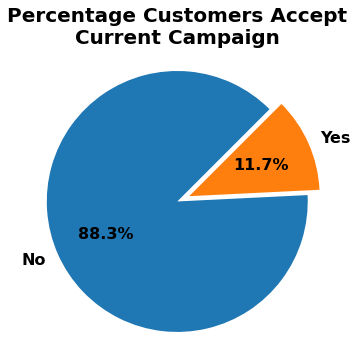

In [4]:
# Let's check whether our target classes are balanced.

# Set wedge labels and sizes.
wedge_labels = 'No', 'Yes' 
wedge_sizes = [1 - target.mean(), target.mean()]

# Initialize a new figure.
fig, ax = plt.subplots()

# Draw the pie chart.
ax.pie(x=wedge_sizes,
           explode=(0, 0.15),
           labels=wedge_labels,
           autopct='%1.1f%%',
           startangle=45,
           radius=1.5,
           textprops={'size': 16, 'weight': 'bold'}
          )

ax.set_title('Percentage Customers Accept\nCurrent Campaign', y=1.20, size=20, weight='bold')

plt.show()
plt.close()

<ins>__Takeaways:__</ins>

<br>From this figure we can see that our classes are very unbalanced. This means that when splitting out dataset into train and test sets, we need to stratify our target, so we don't run the risk of having the least common class not appear in one of the sets.

In [5]:
# Set a seed for replicability purposes.
seed = 42

# Split our data into train and test sets.
x_train, x_test, y_train, y_test = train_test_split(predictors,
                                                                           target,
                                                                           test_size=0.20,
                                                                           stratify=target,
                                                                           random_state=seed
                                                                          )

x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [6]:
# Confirm that CustomerID has no duplicate values.
print(x_train['Custid'].nunique())
print(x_test['Custid'].nunique())

2000
500


In [7]:
# Check dtypes and missing values.
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Custid               2000 non-null   int64         
 1   Year_Birth           2000 non-null   int64         
 2   Education            2000 non-null   object        
 3   Marital_Status       2000 non-null   object        
 4   Income               1985 non-null   float64       
 5   Kidhome              2000 non-null   int64         
 6   Teenhome             2000 non-null   int64         
 7   Dt_Customer          2000 non-null   datetime64[ns]
 8   Recency              2000 non-null   int64         
 9   MntSneakers          2000 non-null   int64         
 10  MntTShirts           2000 non-null   int64         
 11  MntRackets           2000 non-null   int64         
 12  MntWatches           2000 non-null   int64         
 13  MntHats              1953 non-nul

In [8]:
# Get number of missing values per column in our dependent variables of the training set.
x_train.isnull().sum()

Custid                  0
Year_Birth              0
Education               0
Marital_Status          0
Income                 15
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntSneakers             0
MntTShirts              0
MntRackets              0
MntWatches              0
MntHats                47
MntPremium_Brand       15
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
Complain                0
dtype: int64

In [9]:
# Get number of missing values in our target variable of the training set.
y_train.isnull().sum()

0

In [10]:
# Confirm which columns have missing values in our dependent variables.
columns_with_nans = []
for column in x_train.columns:
    if x_train[column].isnull().any():
        columns_with_nans.append(column)

columns_with_nans

['Income', 'MntHats', 'MntPremium_Brand']

In [11]:
x_train.describe()

,Custid,Year_Birth,Income,Kidhome,Teenhome,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
count,2.000000e+03,2000.000000,1985.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.002389e+07,1971.335500,62851.255416,0.445500,0.510000,49.479500,295.614500,39.472000,247.793500,24.995000,...,8.081000,4.505000,6.628500,5.231000,0.086000,0.065500,0.089000,0.072000,0.010000,0.008500
std,1.148984e+04,12.076086,26001.239540,0.535886,0.542261,28.706369,329.938889,58.121909,324.895769,36.340188,...,3.320234,2.810503,3.279461,2.570203,0.280434,0.247468,0.284815,0.258553,0.099524,0.091826
min,1.000412e+07,1944.000000,2544.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001368e+07,1961.000000,43561.000000,0.000000,0.000000,25.000000,25.000000,3.000000,23.000000,2.000000,...,6.000000,2.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.002400e+07,1972.000000,61835.000000,0.000000,0.000000,49.000000,163.000000,12.000000,93.000000,9.000000,...,7.000000,4.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.003392e+07,1980.000000,83281.000000,1.000000,1.000000,74.000000,494.000000,51.000000,350.000000,32.000000,...,10.000000,6.000000,9.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.004410e+07,1999.000000,161087.000000,2.000000,2.000000,99.000000,1494.000000,296.000000,1482.000000,179.000000,...,30.000000,13.000000,14.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
x_train.describe(include=['O'])

,Education,Marital_Status
count,2000,2000
unique,5,5
top,Graduation,Married
freq,972,764


In [13]:
y_train.describe()

count    2000.000000
mean        0.117000
std         0.321501
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: DepVar, dtype: float64

<a class="anchor" id="data-cleaning"></a>
## 3.2: Data Cleaning

<a class="anchor" id="missing-values"></a>
### 3.2.1: Missing Values

### Inspect the effects of applying different substitution methods to missing values on each feature's distribution

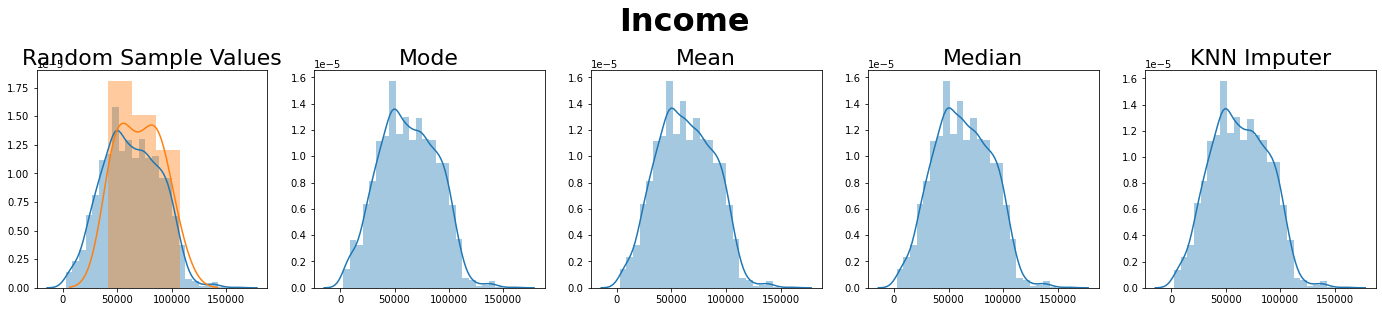

            Original    Random_Vals          Mode           Mean  \
count    2480.000000    2000.000000    2000.00000    2000.000000   
mean    62970.622177   62908.998000   62447.37100   62851.255416   
std     25975.187743   25969.468916   26317.08184   25903.502421   
min      2544.000000    2544.000000    2544.00000    2544.000000   
25%     43513.750000   43598.750000   43190.75000   43621.500000   
50%     62075.500000   61845.000000   61534.50000   61973.000000   
75%     83435.000000   83350.000000   82991.25000   82991.250000   
max    161087.000000  161087.000000  161087.00000  161087.000000   

              Median    KNN_Imputer  
count    2000.000000    2000.000000  
mean    62843.633500   62855.059588  
std     25903.650886   25974.951150  
min      2544.000000    2544.000000  
25%     43621.500000   43549.500000  
50%     61835.000000   61839.500000  
75%     82991.250000   83146.000000  
max    161087.000000  161087.000000   



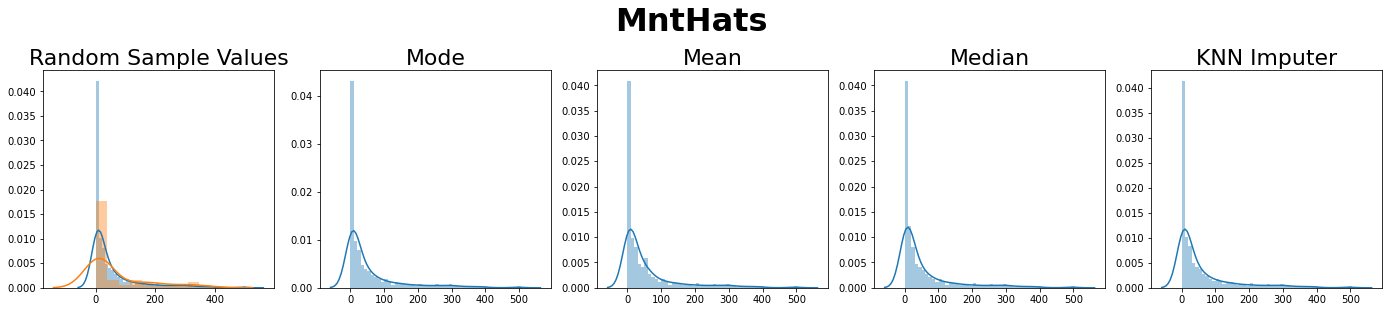

          Original  Random_Vals         Mode         Mean       Median  \
count  2448.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     56.748366    57.565000    56.026000    57.374296    56.449000   
std      88.619423    90.678741    89.719441    89.297260    89.496342   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.000000     4.000000     2.000000     4.000000     4.000000   
50%      18.000000    18.000000    18.000000    20.000000    18.000000   
75%      68.000000    66.000000    64.000000    64.000000    64.000000   
max     504.000000   504.000000   504.000000   504.000000   504.000000   

       KNN_Imputer  
count  2000.000000  
mean     57.562259  
std      89.830729  
min       0.000000  
25%       4.000000  
50%      20.000000  
75%      68.000000  
max     504.000000   



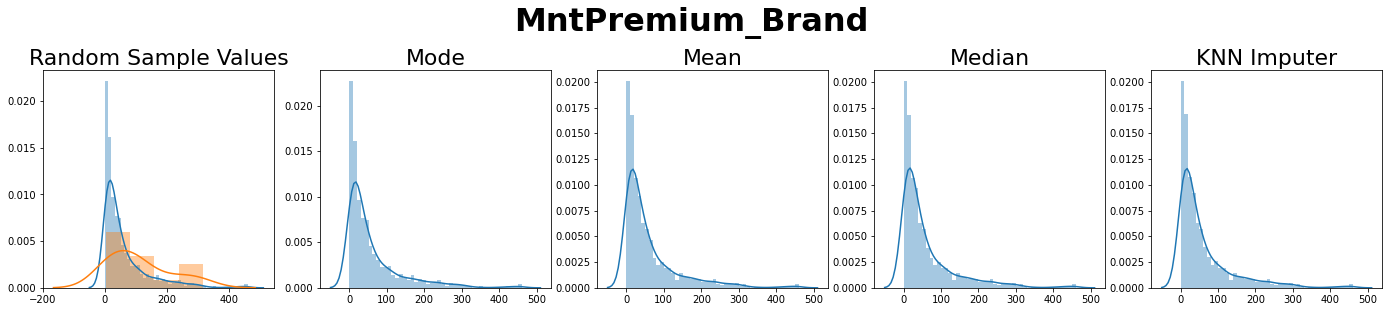

          Original  Random_Vals         Mode         Mean       Median  \
count  2472.000000    2000.0000  2000.000000  2000.000000  2000.000000   
mean     60.324838      61.1475    60.358500    60.784383    60.568500   
std      74.871081      77.2330    76.816107    76.659639    76.699874   
min       0.000000       0.0000     0.000000     0.000000     0.000000   
25%      12.000000      12.0000    11.000000    12.000000    12.000000   
50%      32.000000      32.0000    32.000000    33.000000    32.000000   
75%      77.000000      77.0000    76.000000    76.000000    76.000000   
max     460.000000     460.0000   460.000000   460.000000   460.000000   

       KNN_Imputer  
count  2000.000000  
mean     60.741644  
std      76.748258  
min       0.000000  
25%      12.000000  
50%      32.000000  
75%      76.000000  
max     460.000000   



In [14]:
# Create a copy of our original DataFrame, minus the categorical columns (the KNN Imputer method only takes numerical columns).
imputer_copy = x_train.copy().drop(columns=['Education', 'Marital_Status', 'Dt_Customer'])

# Create an instance of the KNN Imputer, explicitly setting the number of neighbors to find, and the weights for the average.
# We choose weights='distance' in order to calculate a weighted average where the closest neighbors contribute more
# to that average than neighbors that are farther away. The distance metric is Euclidian distance.
imputer = KNNImputer(n_neighbors=5, weights='distance')

# Apply the imputation to our data.
imputed_output = imputer.fit_transform(imputer_copy)

# Because the KNN Imputer returns a matrix, we need to transform it back into a DataFrame.
imputed_df = pd.DataFrame(imputed_output, columns=imputer_copy.columns)

# Apply other methods (random sample values, mode, mean, and median imputation) to the columns that have missing values.
for column in columns_with_nans:
    
    # Create an empty DataFrame to store descriptive statistics in so we can compare the effect of the different methods.
    descriptor = pd.DataFrame()
    
    # Concatenate descriptive statistics from original data to empty DataFrame row-wise.
    descriptor = pd.concat([descriptor, data_df[column].describe()], axis=1)

    # Get indices of the missing values for the current column.
    nan_indices = x_train[column].index[x_train[column].apply(np.isnan)]
    
    # Create a copy of the current column and drop missing values so they don't
    # skew our calculations of the substituion metrics.
    without_nans = x_train[column].copy().drop(nan_indices)
    
    # Get the number of missing values we have for the current column.
    n_nans = len(nan_indices)
    
    # Randomly select values from the current column, up to the number of missing values the current column has.
    random_sample_values = random.choices(population=without_nans.values, k=n_nans)

    # Get the mode of the current column; if the distribution is multimodal, use the average of all modes.
    mode = without_nans.mode()[0] if len(without_nans.mode()) == 1 else without_nans.mode().mean()
    
    # Get the mean of the current column.
    mean = without_nans.mean()
    
    # Get the median of the current column.
    median = without_nans.median()
    
    # Initialize a new figure.
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 4))
    
    # Iterate through the different metrics and replace outliers with each metric type.
    metrics = [random_sample_values, mode, mean, median]
    metric_names = ['Random Sample Values', 'Mode', 'Mean', 'Median']
    
    for n, (metric, name) in enumerate(zip(metrics, metric_names)):

        # Create a copy of the current column so we don't set any values permanently to the original DataFrame.
        column_copy = x_train[column].copy()
        
        # Replace the missing values with the current method's values.
        column_copy.loc[nan_indices] = metric
        
        # Draw the distribution of the current column with the replaced missing values.
        sns.distplot(column_copy,
                           ax=axes[n]
                         )
        
        # Format axis elements.
        axes[n].set_title(name, size=22)
        axes[n].set_xlabel('')
        
        # Concatenate descriptive statistics from substituted data to descriptor DataFrame row-wise.
        descriptor = pd.concat([descriptor, column_copy.describe()], axis=1)

    # Draw the distribution of the random sample values so we make sure their distribution follows that of the original data.
    sns.distplot(random_sample_values,
                       ax=axes[0]
                     )
    
    # Draw the distribution of the current column with KNN-imputed missing values.
    sns.distplot(imputed_df[column],
                       ax=axes[4]
                      )
    
    # Format axis elements.
    axes[4].set_title('KNN Imputer', size=22)
    axes[4].set_xlabel('')
    
    # Draw a title for the whole figure.
    plt.suptitle(column, y=1.10, size=32, weight='bold')

    plt.show()
    plt.close()
    
    descriptor = pd.concat([descriptor, imputed_df[column].describe()], axis=1)
    
    # Rename the descriptor columns.
    descriptor.columns = ['Original', 'Random_Vals', 'Mode', 'Mean', 'Median', 'KNN_Imputer']
    print(descriptor, '\n')

From these results, we can observe that no particular metric disrupts the distribution of any of our features. Therefore, we choose to use the mode to replace the missing values.

### Replace Missing Values

In [15]:
categorical_columns = ['Education', 'Marital_Status', 'Dt_Customer']
categorical_train_df = x_train.loc[:, categorical_columns]
numerical_train_df = x_train.copy().drop(columns=categorical_columns)
categorical_test_df = x_test.loc[:, categorical_columns]
numerical_test_df = x_test.copy().drop(columns=categorical_columns)

# Instantiate the KNN Imputer.
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')

# Fit the KKN Imputer to the training set.
knn_output = knn_imputer.fit_transform(x_train.drop(columns=categorical_columns))
x_train = pd.DataFrame(knn_output, columns=numerical_train_df.columns)
x_train = pd.concat([x_train, categorical_train_df], axis=1)

# Fit the KKN Imputer to the test set.
knn_output = knn_imputer.fit_transform(x_test.drop(columns=categorical_columns))
x_test = pd.DataFrame(knn_output, columns=numerical_test_df.columns)
x_test = pd.concat([x_test, categorical_test_df], axis=1)

x_train.head()

,Custid,Year_Birth,Income,Kidhome,Teenhome,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,...,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,Education,Marital_Status,Dt_Customer
0,10042366.0,1965.0,64227.0,0.0,1.0,9.0,425.0,0.0,87.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Graduation,Together,2016-02-11
1,10031646.0,1968.0,65261.0,1.0,1.0,46.0,369.0,68.0,282.0,18.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Graduation,Together,2015-08-26
2,10022794.0,1977.0,22649.0,1.0,0.0,98.0,2.0,20.0,17.0,17.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Basic,Single,2015-11-18
3,10030678.0,1954.0,80934.0,0.0,1.0,63.0,757.0,120.0,326.0,20.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Graduation,Together,2015-08-13
4,10011754.0,1959.0,87981.0,0.0,0.0,47.0,621.0,119.0,621.0,158.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2n Cycle,Married,2016-10-13


In [16]:
# Check that Missing Values have actually been replaced.
x_train.isnull().sum()

Custid                 0
Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntSneakers            0
MntTShirts             0
MntRackets             0
MntWatches             0
MntHats                0
MntPremium_Brand       0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
Complain               0
Education              0
Marital_Status         0
Dt_Customer            0
dtype: int64

<a class="anchor" id="outliers"></a>
### 3.2.2: Outliers

### Calculate and visualize outliers

We will define outliers through two different methods:<br>
In the IQR method, values that lie 1.5 times the interquartile range below the first quartile, or 1.5 times the interquartile range above the third quartile are tagged as outliers; in the z-score method, the data is standardized through z-score, and any observation that lies more than +/- three standard deviations 
away from the mean are tagged as outliers, since these will represent less that 0.3% of the sample's observations. This second method therefore captures only the most extreme of outliers.

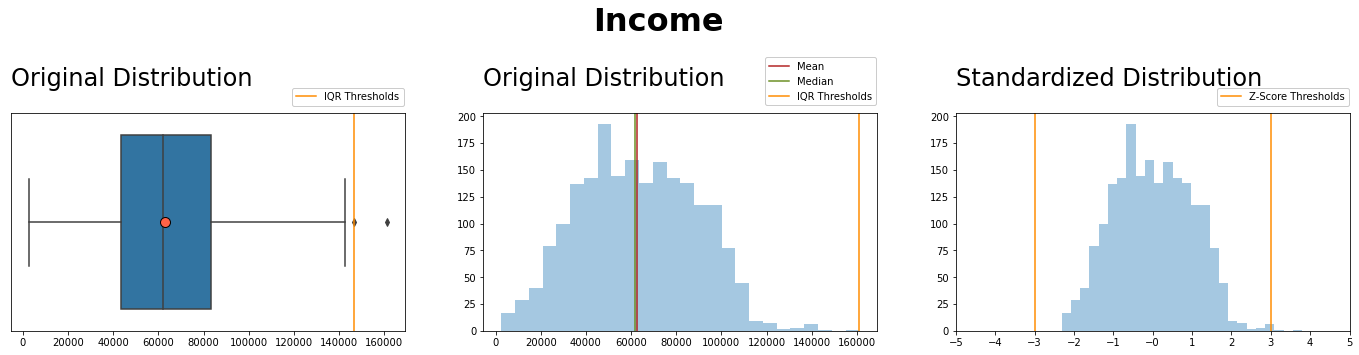

IQR outliers:
N total outliers in Income:2
N lower outliers: 0
N upper outliers: 2 

z-score outliers:
N total outliers in Income:4
N lower outliers: 0
N upper outliers: 4 

Common outlier values: [146731.0, 161087.0] 



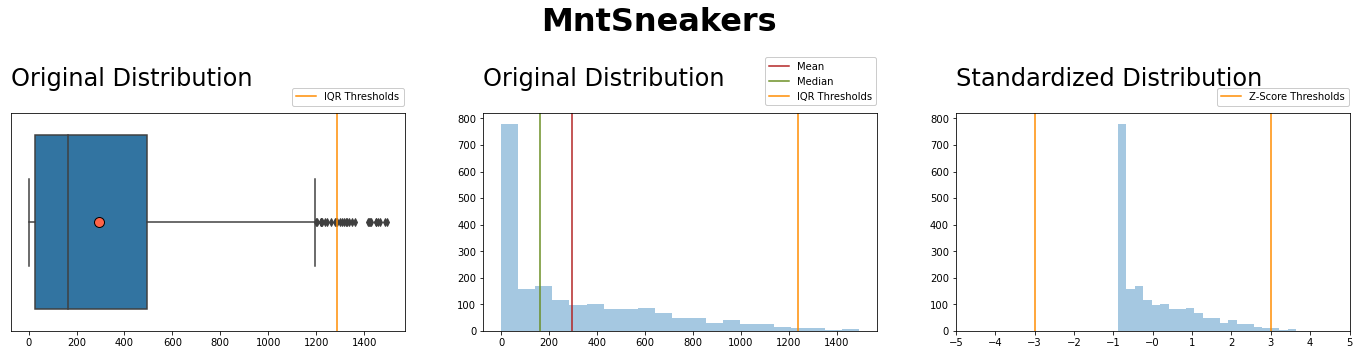

IQR outliers:
N total outliers in MntSneakers:31
N lower outliers: 0
N upper outliers: 31 

z-score outliers:
N total outliers in MntSneakers:19
N lower outliers: 0
N upper outliers: 19 

Common outlier values: [1288.0, 1301.0, 1308.0, 1314.0, 1324.0, 1329.0, 1338.0, 1351.0, 1363.0, 1416.0, 1419.0, 1423.0, 1427.0, 1448.0, 1450.0, 1459.0, 1467.0, 1486.0, 1494.0] 



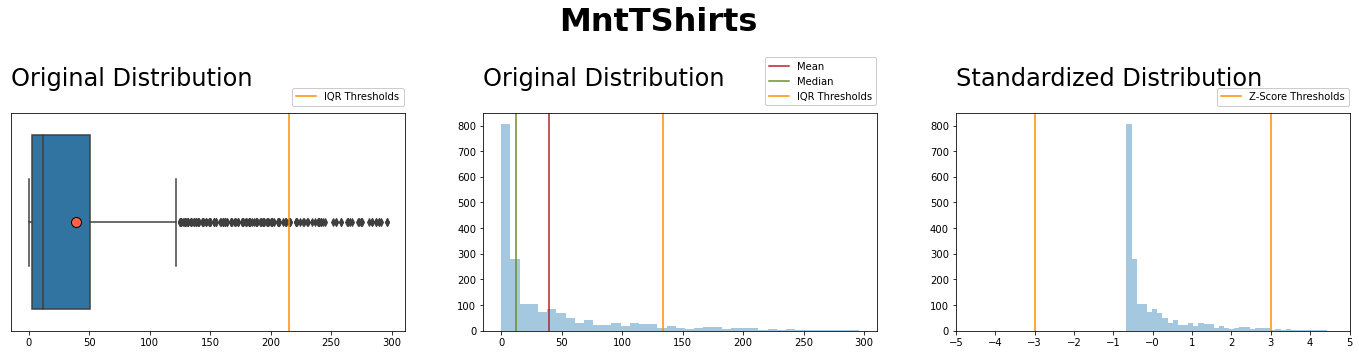

IQR outliers:
N total outliers in MntTShirts:198
N lower outliers: 0
N upper outliers: 198 

z-score outliers:
N total outliers in MntTShirts:48
N lower outliers: 0
N upper outliers: 48 

Common outlier values: [215.0, 216.0, 216.0, 221.0, 221.0, 221.0, 222.0, 224.0, 227.0, 228.0, 230.0, 231.0, 234.0, 237.0, 239.0, 239.0, 240.0, 240.0, 240.0, 242.0, 242.0, 243.0, 245.0, 252.0, 254.0, 254.0, 258.0, 258.0, 263.0, 264.0, 264.0, 266.0, 267.0, 272.0, 273.0, 275.0, 275.0, 276.0, 281.0, 284.0, 284.0, 287.0, 287.0, 290.0, 290.0, 291.0, 296.0, 296.0] 



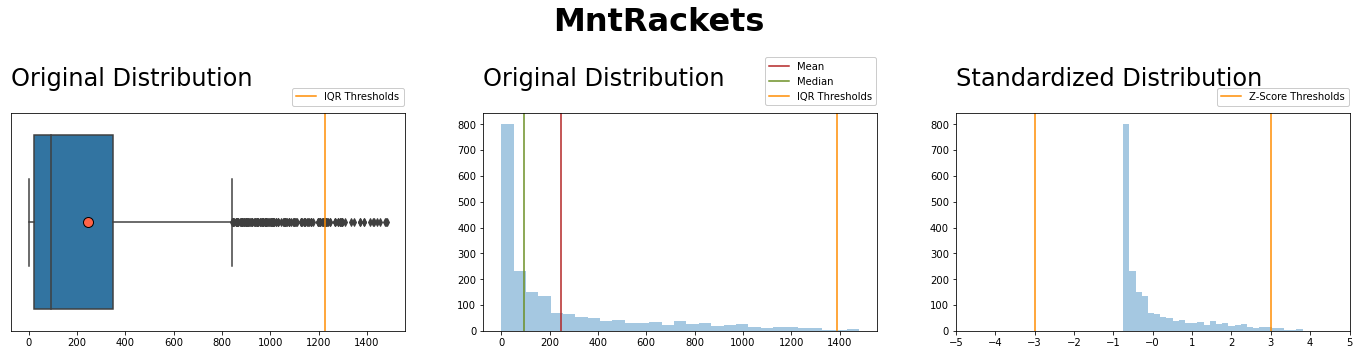

IQR outliers:
N total outliers in MntRackets:164
N lower outliers: 0
N upper outliers: 164 

z-score outliers:
N total outliers in MntRackets:35
N lower outliers: 0
N upper outliers: 35 

Common outlier values: [1226.0, 1226.0, 1229.0, 1232.0, 1236.0, 1241.0, 1247.0, 1247.0, 1268.0, 1268.0, 1269.0, 1280.0, 1281.0, 1289.0, 1290.0, 1293.0, 1296.0, 1296.0, 1298.0, 1299.0, 1310.0, 1335.0, 1346.0, 1373.0, 1373.0, 1388.0, 1389.0, 1413.0, 1425.0, 1431.0, 1440.0, 1454.0, 1475.0, 1479.0, 1482.0] 



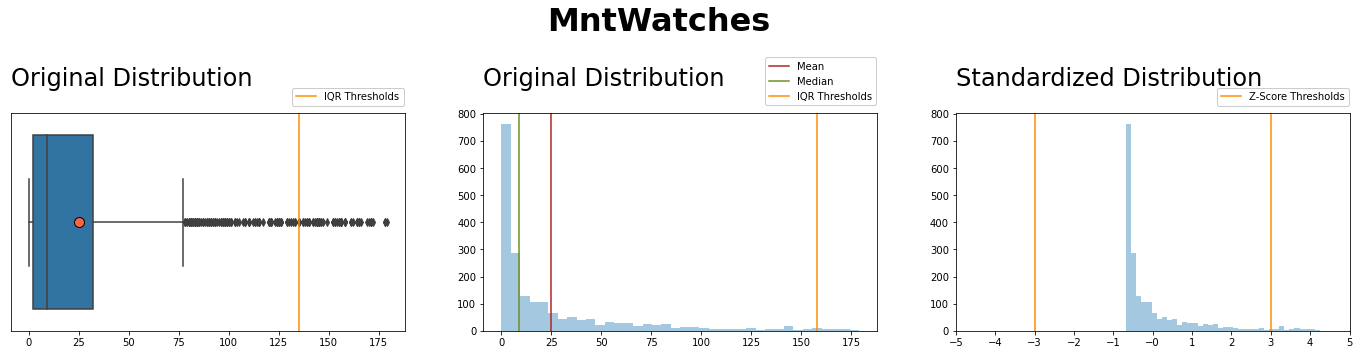

IQR outliers:
N total outliers in MntWatches:192
N lower outliers: 0
N upper outliers: 192 

z-score outliers:
N total outliers in MntWatches:64
N lower outliers: 0
N upper outliers: 64 

Common outlier values: [135.0, 135.0, 135.0, 137.0, 137.0, 138.0, 139.0, 139.0, 140.0, 140.0, 140.0, 142.0, 142.0, 143.0, 144.0, 144.0, 144.0, 144.0, 144.0, 144.0, 145.0, 145.0, 145.0, 145.0, 145.0, 146.0, 146.0, 147.0, 149.0, 152.0, 152.0, 153.0, 153.0, 154.0, 155.0, 155.0, 156.0, 156.0, 156.0, 156.0, 156.0, 156.0, 158.0, 158.0, 158.0, 161.0, 161.0, 162.0, 164.0, 164.0, 165.0, 165.0, 165.0, 166.0, 169.0, 170.0, 171.0, 171.0, 171.0, 171.0, 172.0, 178.0, 178.0, 179.0] 



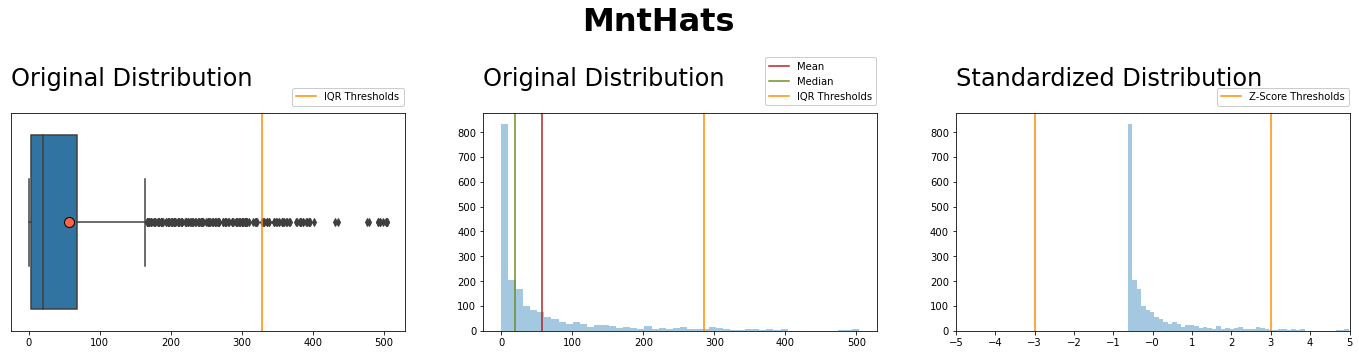

IQR outliers:
N total outliers in MntHats:223
N lower outliers: 0
N upper outliers: 223 

z-score outliers:
N total outliers in MntHats:54
N lower outliers: 0
N upper outliers: 54 

Common outlier values: [328.0, 330.0, 332.0, 332.0, 336.0, 336.0, 336.0, 338.0, 338.0, 346.0, 346.0, 346.0, 348.0, 350.0, 352.0, 353.0, 356.0, 356.0, 358.0, 360.0, 362.0, 364.0, 366.0, 368.0, 376.0, 378.0, 382.0, 382.0, 382.0, 382.0, 384.0, 386.0, 386.0, 390.0, 392.0, 394.0, 394.0, 394.0, 394.0, 396.0, 402.0, 431.0, 436.0, 477.0, 479.0, 492.0, 492.0, 494.0, 494.0, 499.0, 503.0, 503.0, 504.0, 504.0] 



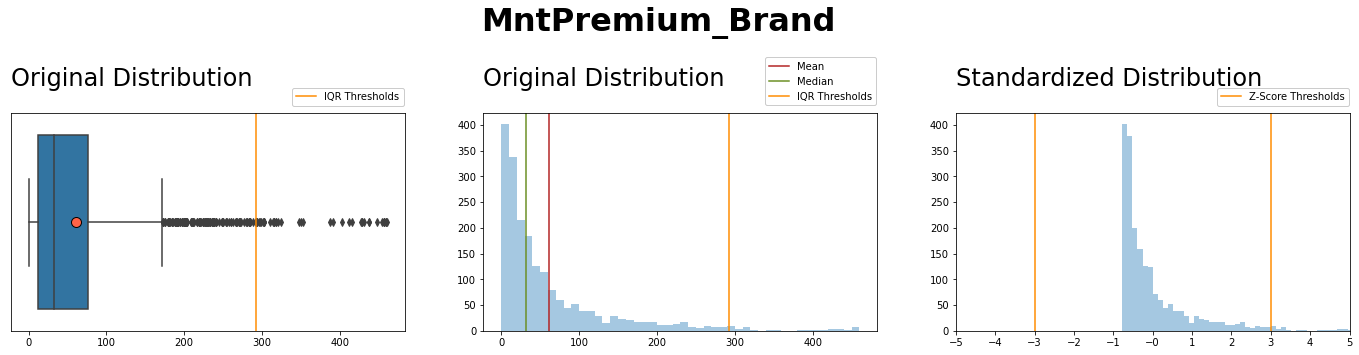

IQR outliers:
N total outliers in MntPremium_Brand:184
N lower outliers: 0
N upper outliers: 184 

z-score outliers:
N total outliers in MntPremium_Brand:45
N lower outliers: 0
N upper outliers: 45 

Common outlier values: [292.0, 292.0, 292.0, 292.0, 293.0, 293.0, 296.0, 297.0, 298.0, 301.0, 302.0, 302.0, 303.0, 310.0, 314.0, 315.0, 315.0, 315.0, 318.0, 318.0, 320.0, 324.0, 348.0, 350.0, 352.0, 387.0, 391.0, 403.0, 412.0, 415.0, 427.0, 428.0, 428.0, 431.0, 437.0, 437.0, 447.0, 454.0, 457.0, 457.0, 457.0, 457.0, 459.0, 459.0, 460.0] 



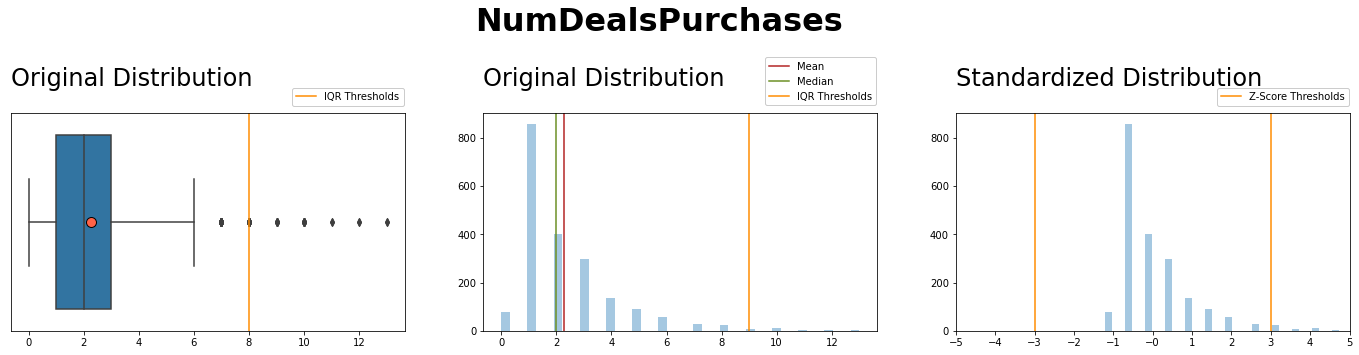

IQR outliers:
N total outliers in NumDealsPurchases:80
N lower outliers: 0
N upper outliers: 80 

z-score outliers:
N total outliers in NumDealsPurchases:51
N lower outliers: 0
N upper outliers: 51 

Common outlier values: [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 12.0, 12.0, 13.0, 13.0] 



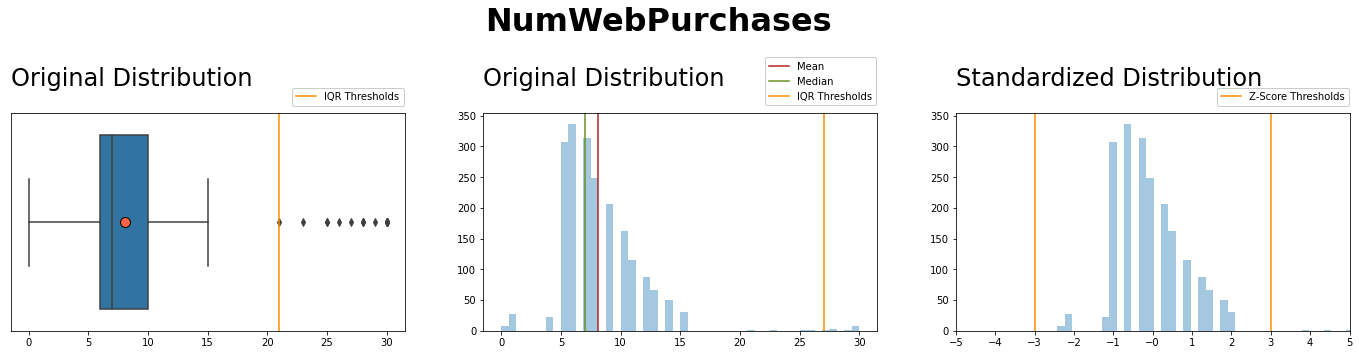

IQR outliers:
N total outliers in NumWebPurchases:18
N lower outliers: 0
N upper outliers: 18 

z-score outliers:
N total outliers in NumWebPurchases:18
N lower outliers: 0
N upper outliers: 18 

Common outlier values: [21.0, 23.0, 25.0, 25.0, 26.0, 27.0, 28.0, 28.0, 28.0, 29.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0] 



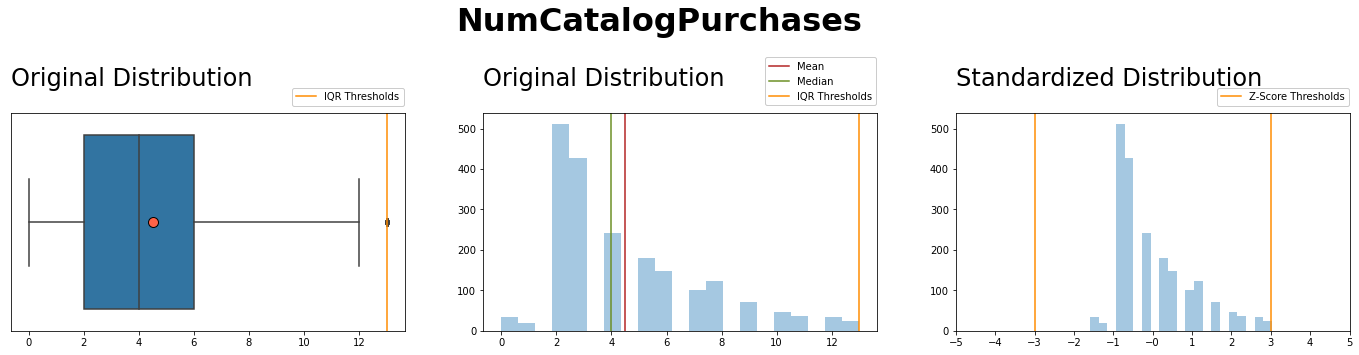

IQR outliers:
N total outliers in NumCatalogPurchases:24
N lower outliers: 0
N upper outliers: 24 

z-score outliers:
N total outliers in NumCatalogPurchases:24
N lower outliers: 0
N upper outliers: 24 

Common outlier values: [13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0] 



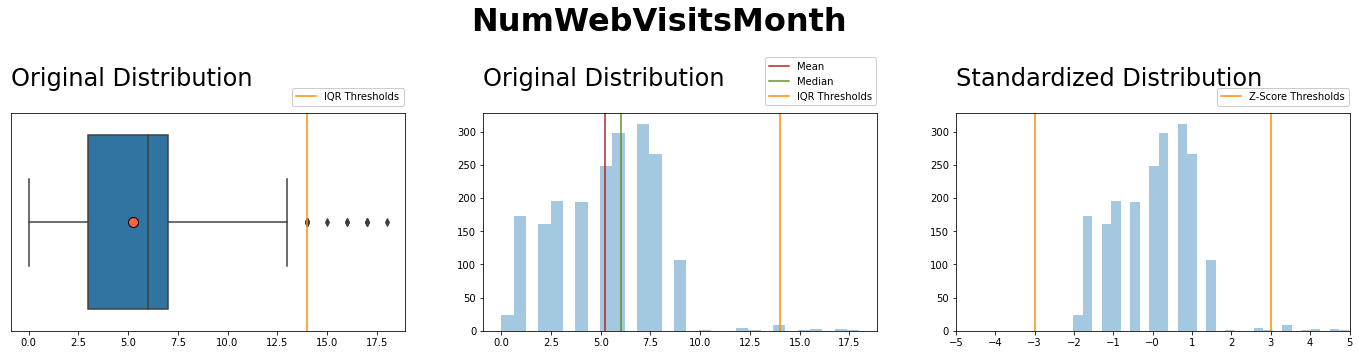

IQR outliers:
N total outliers in NumWebVisitsMonth:15
N lower outliers: 0
N upper outliers: 15 

z-score outliers:
N total outliers in NumWebVisitsMonth:16
N lower outliers: 0
N upper outliers: 16 

Common outlier values: [14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 16.0, 16.0, 17.0, 17.0, 17.0, 18.0] 



In [17]:
# Exclude the first column and the last nine columns, and keep all the others, thus excluding categorical columns,
# as welll as the Campaign and Complaint response columns.
columns = x_train.columns[1:-9]

# Dictionary to store indices of outliers detected by the IQR method.
iqr_outlier_indices_train = {}

# Dictionary to store indices of outliers detected by both IQR and z-score methods.
common_outlier_indices_train = {}

# Define threshold from which to consider outliers when applying the z-score method.
z_threshold = 3

# Iterate through each column.
for column in columns:

    # Only proceed if the current column is numerical.
    if type(x_train[column][0]) != np.int64 and type(x_train[column][0]) != np.float64:
        continue
        
    #######################################################################################################################
    ##### IQR METHOD FOR OUTLIER DETECTION ##############################################################################
    #######################################################################################################################
    
    # Get first and third quantiles.
    q1 = x_train[column].quantile(0.25)
    q3 = x_train[column].quantile(0.75)
    
    # Set threshold for calculating lower and upper limits for outlier detection.
    threshold = 1.5
    
    # Calculate the lower and upper bounds.
    lower_bound = q1 - (q3 - q1) * threshold
    upper_bound = q3 + (q3 - q1) * threshold
    
    # Select observations that lie below or above our lower and upper bounds, respectively.
    lower_iqr_outliers = x_train[column][x_train[column] < lower_bound].values
    upper_iqr_outliers = x_train[column][x_train[column] > upper_bound].values
    
    # If there are no outliers, proceed to the next column.
    if len(lower_iqr_outliers) == 0 and len(upper_iqr_outliers)== 0:
        continue

    # Get outlier indices.
    lower_iqr_indices = x_train[column][x_train[column] < lower_bound].index
    upper_iqr_indices = x_train[column][x_train[column] > upper_bound].index

    # Store the calculated indices in our dictionary.
    iqr_outlier_indices_train[column] = np.concatenate((lower_iqr_indices, upper_iqr_indices), axis=None)

    # Initialize a new figure.
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,4))
    
    # Draw a boxplot of the current column.
    sns.boxplot(column,
                       data=x_train,
                       orient='horizontal',
                       showmeans=True,
                       meanprops={'markerfacecolor': 'tomato', 'markeredgecolor': 'black', 'markersize': 10, 'marker': 'o'},
                       ax=axes[0]
                      )
    
    # Draw a histogram of the original, untransformed data.
    sns.distplot(x_train[column],
                       kde=False,
                       ax=axes[1]
                      )

    # Draw a vertical line at the mean of the histogram.
    mean_line = axes[1].axvline(x_train[column].mean(), color='firebrick')
    
    # Draw a vertical line at the median of the histogram.
    median_line = axes[1].axvline(x_train[column].median(), color='olivedrab')
    
    # If we have lower outliers, draw a vertical line at the lower bound.
    if len(lower_iqr_outliers) != 0:
        axes[1].axvline(x=lower_iqr_outliers[-1], color='darkorange')
    
    # If we have upper outliers, draw a vertical line at the upper bound.
    if len(upper_iqr_outliers) != 0:
        axes[1].axvline(x=upper_iqr_outliers[0], color='darkorange')

    ######################################################################################################################
    ##### Z-SCORE METHOD FOR OUTLIER DETECTION ########################################################################
    ######################################################################################################################

    # Standardize data in the current column by applying z-score standardization.
    z_scored = stats.zscore(x_train[column])

    # Draw a histogram of the standardized (z-scored) data.
    sns.distplot(z_scored,
                       kde=False,
                       ax=axes[2],
                      )

    # Select observations that lie below or above ou lower and upper bounds, respectively.
    lower_zscore_outliers = z_scored[z_scored < -z_threshold]
    upper_zscore_outliers = z_scored[z_scored > z_threshold]
    
    # Get outliers' indices.
    lower_zscore_outliers_indices = np.where(z_scored < -z_threshold)
    upper_zscore_outliers_indices = np.where(z_scored > z_threshold)
    
    # Draw a vertical line at the lower and upper threshold points, irrespective of whether we have outliers or not.
    axes[2].axvline(x=-z_threshold, color='darkorange')
    axes[2].axvline(x=z_threshold, color='darkorange')
    
    ######################################################################################################################
    ##### COMMON OUTLIER DETECTION ####################################################################################
    ######################################################################################################################
    
    # Create list to store outliers detected by both IQR and z-score methods.
    total_common_indices = []
    
    # If there are lower outliers detected, check both methods' lower outlier lists and get common outliers.
    if len(lower_iqr_outliers) != 0 and len(lower_zscore_outliers) != 0:
        
        # Convert outlier lists into sets so we can use set intersection.
        lower_iqr_indices_set = set(lower_iqr_indices)
        lower_zscore_indices_set = set(lower_zscore_outliers_indices[0])
        common_lower_outlier_indices = sorted(list(lower_iqr_indices_set.intersection(lower_zscore_indices_set)))

        # Add common outliers to the total_common_indices list.
        total_common_indices.extend(common_lower_outlier_indices)
    
    # If there are upper outliers detected, check both methods' upper outlier lists and get common outliers.
    if len(upper_iqr_outliers) != 0 and len(upper_zscore_outliers) != 0:
        
        # Convert outlier lists into sets so we can use set intersection.
        upper_iqr_indices_set = set(upper_iqr_indices)
        upper_zscore_indices_set = set(upper_zscore_outliers_indices[0])
        common_upper_outlier_indices = sorted(list(upper_iqr_indices_set.intersection(upper_zscore_indices_set)))

        # Add common outliers to the total_common_indices list.
        total_common_indices.extend(common_upper_outlier_indices)
    
    # If there are common outliers, use their indices to get their values for analysis.
    if len(total_common_indices) != 0:
        total_common_indices = sorted(total_common_indices)
        outlier_observations = x_train.loc[total_common_indices, column]
    
        # Add the common outlier indices of the current column to the initial dictionary.
        common_outlier_indices_train[column] = total_common_indices

        # Draw a line in the boxplot at the position of the smallest outlier for the current column.
        smallest_outlier_observation = min(outlier_observations.values)
        smallest_outlier_line = axes[0].axvline(smallest_outlier_observation, color='darkorange')
        axes[0].legend(handles=[smallest_outlier_line],
                                labels=['IQR Thresholds'],
                                bbox_to_anchor=(1.01, 1.14),
                                framealpha=1.0
                               )
    
    # Format axis elements.
    plt.suptitle(column, y=1.25, size=32, weight='bold')
    axes[0].set_title('Original Distribution', y=1.10, size=24, loc='left')
    axes[0].set_yticks([])
    axes[0].set_ylabel('')
    axes[0].set_xlabel('')
    axes[1].set_title('Original Distribution', y=1.10, size=24, loc='left')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].legend(labels=['Mean', 'Median', 'IQR Thresholds'], bbox_to_anchor=(1.01, 1.28), framealpha=1.0)
    axes[2].set_title('Standardized Distribution', y=1.10, size=24, loc='left')
    axes[2].set_xlim(-5, 5)
    axes[2].set_xticks(np.arange(-5-0.01, 5+0.01))
    axes[2].set_ylabel('')
    axes[2].set_xlabel('')
    axes[2].legend(labels=['Z-Score Thresholds'], bbox_to_anchor=(1.01, 1.14), framealpha=1.0)

    plt.show()
    plt.close()
    
    # Calculate total amount of outliers.
    total_iqr_outliers = len(lower_iqr_outliers) + len(upper_iqr_outliers)
    
    print('IQR outliers:')
    print('N total outliers in ' + column + ':' + str(total_iqr_outliers))
    print('N lower outliers:', str(len(lower_iqr_outliers)))
    print('N upper outliers:', str(len(upper_iqr_outliers)), '\n')
    
    # Calculate total amount of outliers.
    total_zscore_outliers = len(lower_zscore_outliers) + len(upper_zscore_outliers)

    print('z-score outliers:')
    print('N total outliers in ' + column + ':' + str(total_zscore_outliers))
    print('N lower outliers:', str(len(lower_zscore_outliers)))
    print('N upper outliers:', str(len(upper_zscore_outliers)), '\n')
    
    # If there are common outliers, print out their values.
    if len(total_common_indices) != 0:
        print('Common outlier values:', sorted(list(outlier_observations.values)), '\n')

In [18]:
# Let's repeat for the test set.

# Exclude the first column and the last nine columns, and keep all the others, thus excluding categorical columns,
# as welll as the Campaign and Complaint response columns.
columns = x_test.columns[1:-9]

# Dictionary to store indices of outliers detected by the IQR method.
iqr_outlier_indices_test = {}

# Dictionary to store indices of outliers detected by both IQR and z-score methods.
common_outlier_indices_test = {}

# Define threshold from which to consider outliers when applying the z-score method.
z_threshold = 3

# Iterate through each column.
for column in columns:

    # Only proceed if the current column is numerical.
    if type(x_test[column][0]) != np.int64 and type(x_test[column][0]) != np.float64:
        continue
        
    #######################################################################################################################
    ##### IQR METHOD FOR OUTLIER DETECTION ##############################################################################
    #######################################################################################################################
    
    # Get first and third quantiles.
    q1 = x_test[column].quantile(0.25)
    q3 = x_test[column].quantile(0.75)
    
    # Set threshold for calculating lower and upper limits for outlier detection.
    threshold = 1.5
    
    # Calculate the lower and upper bounds.
    lower_bound = q1 - (q3 - q1) * threshold
    upper_bound = q3 + (q3 - q1) * threshold
    
    # Select observations that lie below or above our lower and upper bounds, respectively.
    lower_iqr_outliers = x_test[column][x_test[column] < lower_bound].values
    upper_iqr_outliers = x_test[column][x_test[column] > upper_bound].values
    
    # If there are no outliers, proceed to the next column.
    if len(lower_iqr_outliers) == 0 and len(upper_iqr_outliers)== 0:
        continue

    # Get outlier indices.
    lower_iqr_indices = x_test[column][x_test[column] < lower_bound].index
    upper_iqr_indices = x_test[column][x_test[column] > upper_bound].index

    # Store the calculated indices in our dictionary.
    iqr_outlier_indices_test[column] = np.concatenate((lower_iqr_indices, upper_iqr_indices), axis=None)

    ######################################################################################################################
    ##### Z-SCORE METHOD FOR OUTLIER DETECTION ########################################################################
    ######################################################################################################################

    # Standardize data in the current column by applying z-score standardization.
    z_scored = stats.zscore(x_test[column])

    # Select observations that lie below or above ou lower and upper bounds, respectively.
    lower_zscore_outliers = z_scored[z_scored < -z_threshold]
    upper_zscore_outliers = z_scored[z_scored > z_threshold]
    
    # Get outliers' indices.
    lower_zscore_outliers_indices = np.where(z_scored < -z_threshold)
    upper_zscore_outliers_indices = np.where(z_scored > z_threshold)
    
    ######################################################################################################################
    ##### COMMON OUTLIER DETECTION ####################################################################################
    ######################################################################################################################
    
    # Create list to store outliers detected by both IQR and z-score methods.
    total_common_indices = []
    
    # If there are lower outliers detected, check both methods' lower outlier lists and get common outliers.
    if len(lower_iqr_outliers) != 0 and len(lower_zscore_outliers) != 0:
        
        # Convert outlier lists into sets so we can use set intersection.
        lower_iqr_indices_set = set(lower_iqr_indices)
        lower_zscore_indices_set = set(lower_zscore_outliers_indices[0])
        common_lower_outlier_indices = sorted(list(lower_iqr_indices_set.intersection(lower_zscore_indices_set)))

        # Add common outliers to the total_common_indices list.
        total_common_indices.extend(common_lower_outlier_indices)
    
    # If there are upper outliers detected, check both methods' upper outlier lists and get common outliers.
    if len(upper_iqr_outliers) != 0 and len(upper_zscore_outliers) != 0:
        
        # Convert outlier lists into sets so we can use set intersection.
        upper_iqr_indices_set = set(upper_iqr_indices)
        upper_zscore_indices_set = set(upper_zscore_outliers_indices[0])
        common_upper_outlier_indices = sorted(list(upper_iqr_indices_set.intersection(upper_zscore_indices_set)))

        # Add common outliers to the total_common_indices list.
        total_common_indices.extend(common_upper_outlier_indices)
    
    # If there are common outliers, use their indices to get their values for analysis.
    if len(total_common_indices) != 0:
        total_common_indices = sorted(total_common_indices)
        outlier_observations = x_test.loc[total_common_indices, column]
    
        # Add the common outlier indices of the current column to the initial dictionary.
        common_outlier_indices_test[column] = total_common_indices
    
    # Calculate total amount of outliers.
    total_iqr_outliers = len(lower_iqr_outliers) + len(upper_iqr_outliers)
    
    print('IQR outliers:')
    print('N total outliers in ' + column + ':' + str(total_iqr_outliers))
    print('N lower outliers:', str(len(lower_iqr_outliers)))
    print('N upper outliers:', str(len(upper_iqr_outliers)), '\n')
    
    # Calculate total amount of outliers.
    total_zscore_outliers = len(lower_zscore_outliers) + len(upper_zscore_outliers)

    print('z-score outliers:')
    print('N total outliers in ' + column + ':' + str(total_zscore_outliers))
    print('N lower outliers:', str(len(lower_zscore_outliers)))
    print('N upper outliers:', str(len(upper_zscore_outliers)), '\n')
    
    # If there are common outliers, print out their values.
    if len(total_common_indices) != 0:
        print('Common outlier values:', sorted(list(outlier_observations.values)), '\n')

IQR outliers:
N total outliers in Income:2
N lower outliers: 0
N upper outliers: 2 

z-score outliers:
N total outliers in Income:2
N lower outliers: 0
N upper outliers: 2 

Common outlier values: [148687.0, 149195.0] 

IQR outliers:
N total outliers in MntSneakers:5
N lower outliers: 0
N upper outliers: 5 

z-score outliers:
N total outliers in MntSneakers:3
N lower outliers: 0
N upper outliers: 3 

Common outlier values: [1367.0, 1402.0, 1449.0] 

IQR outliers:
N total outliers in MntTShirts:44
N lower outliers: 0
N upper outliers: 44 

z-score outliers:
N total outliers in MntTShirts:16
N lower outliers: 0
N upper outliers: 16 

Common outlier values: [224.0, 227.0, 230.0, 233.0, 237.0, 240.0, 252.0, 254.0, 255.0, 261.0, 261.0, 263.0, 267.0, 272.0, 288.0, 296.0] 

IQR outliers:
N total outliers in MntRackets:31
N lower outliers: 0
N upper outliers: 31 

z-score outliers:
N total outliers in MntRackets:7
N lower outliers: 0
N upper outliers: 7 

Common outlier values: [1277.0, 1344.0

To be more conservative in our outlier treatment, and from the above calculations we decide to use the observations detected by both the IQR and the z-score methods as outliers. Rather than removing these observations, these common findings will be replaced by a given metric, much in the same way as performed for the missing values. This operation is performed and described below.

### Inspect the effects of applying different substitution methods to outliers on each feature's distribution

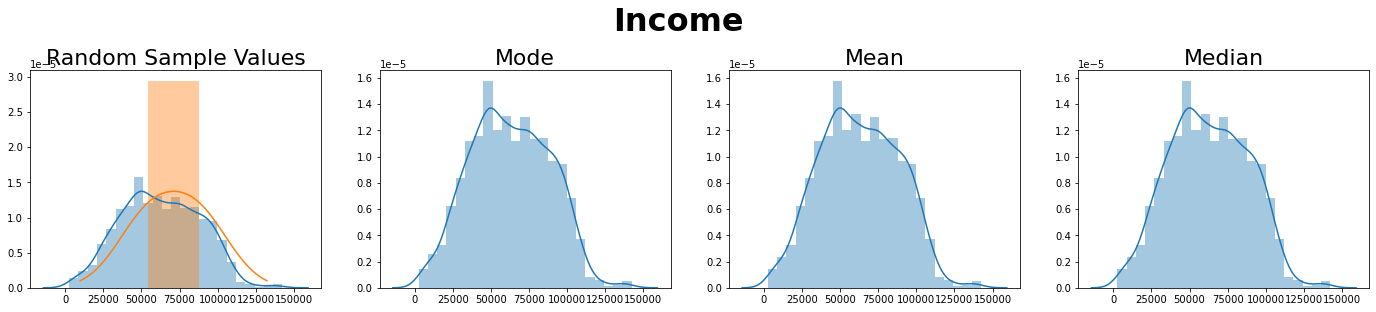

            Original    Random_Vals           Mode           Mean  \
count    2000.000000    2000.000000    2000.000000    2000.000000   
mean    62855.059588   62772.230088   62710.150588   62763.914502   
std     25974.951150   25820.545255   25869.526077   25813.625607   
min      2544.000000    2544.000000    2544.000000    2544.000000   
25%     43549.500000   43549.500000   43486.500000   43549.500000   
50%     61839.500000   61828.500000   61808.000000   61839.500000   
75%     83146.000000   83025.000000   82991.250000   82991.250000   
max    161087.000000  142457.000000  142457.000000  142457.000000   

              Median  
count    2000.000000  
mean    62762.979088  
std     25813.642547  
min      2544.000000  
25%     43549.500000  
50%     61828.500000  
75%     82991.250000  
max    142457.000000   



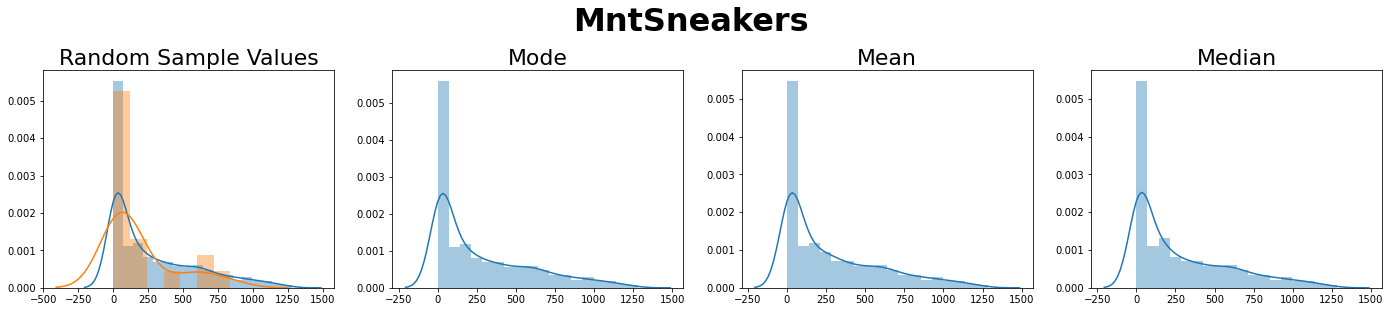

          Original  Random_Vals         Mode         Mean       Median
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean    295.614500   284.209500   282.421500   285.065689   283.913000
std     329.938889   313.036799   313.192538   311.977408   312.220631
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%      25.000000    24.000000    23.000000    25.000000    25.000000
50%     163.000000   158.000000   157.000000   163.000000   158.000000
75%     494.000000   478.500000   476.250000   476.250000   476.250000
max    1494.000000  1282.000000  1282.000000  1282.000000  1282.000000 



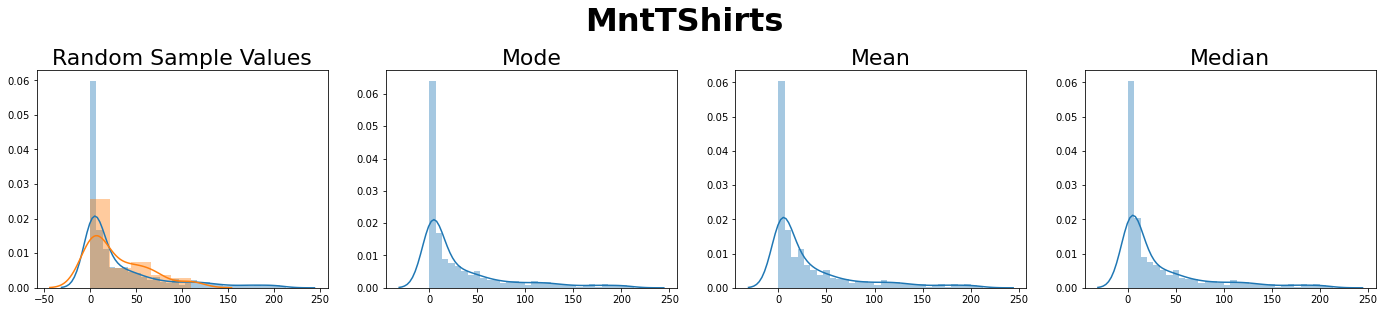

          Original  Random_Vals         Mode         Mean       Median
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean     39.472000    34.088500    33.387000    33.949628    33.603000
std      58.121909    47.549039    47.576759    47.316379    47.444872
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       3.000000     3.000000     2.000000     3.000000     3.000000
50%      12.000000    11.000000    11.000000    12.000000    11.000000
75%      51.000000    47.250000    45.000000    45.000000    45.000000
max     296.000000   213.000000   213.000000   213.000000   213.000000 



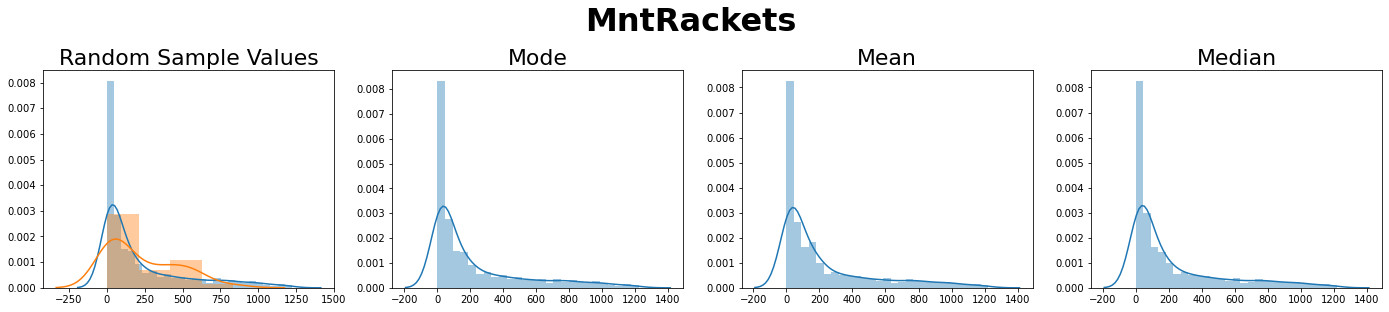

          Original  Random_Vals         Mode         Mean       Median
count  2000.000000   2000.00000  2000.000000  2000.000000  2000.000000
mean    247.793500    228.62500   224.774000   227.625356   225.876500
std     324.895769    292.63623   292.447042   291.139578   291.756647
min       0.000000      0.00000     0.000000     0.000000     0.000000
25%      23.000000     23.00000    21.000000    23.000000    23.000000
50%      93.000000     91.00000    86.000000    93.000000    86.000000
75%     350.000000    326.00000   318.000000   318.000000   318.000000
max    1482.000000   1221.00000  1221.000000  1221.000000  1221.000000 



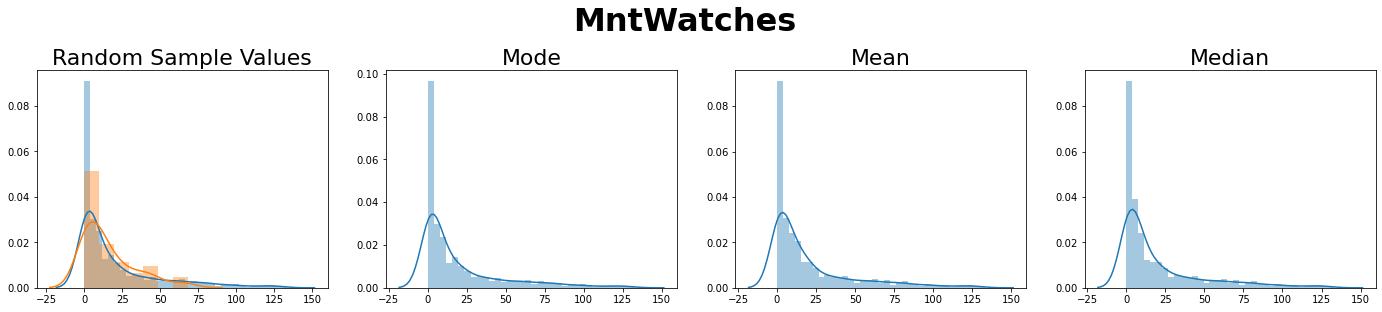

          Original  Random_Vals         Mode         Mean       Median
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean     24.995000    20.598500    20.092000    20.577186    20.316000
std      36.340188    27.974481    28.027849    27.806086    27.893963
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       2.000000     2.000000     1.000000     2.000000     2.000000
50%       9.000000     9.000000     8.000000     9.000000     8.000000
75%      32.000000    27.000000    26.000000    26.000000    26.000000
max     179.000000   133.000000   133.000000   133.000000   133.000000 



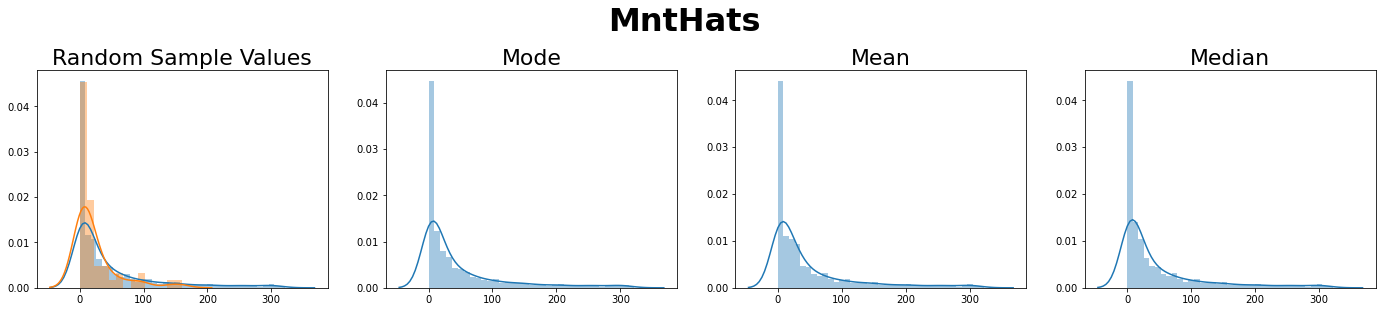

          Original  Random_Vals         Mode         Mean       Median
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean     57.562259    47.570389    46.942759    47.756152    47.320759
std      89.830729    70.017764    70.104950    69.729149    69.888119
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       4.000000     4.000000     2.000000     4.000000     4.000000
50%      20.000000    18.000000    16.000000    20.000000    16.000000
75%      68.000000    60.000000    60.000000    60.000000    60.000000
max     504.000000   322.000000   322.000000   322.000000   322.000000 



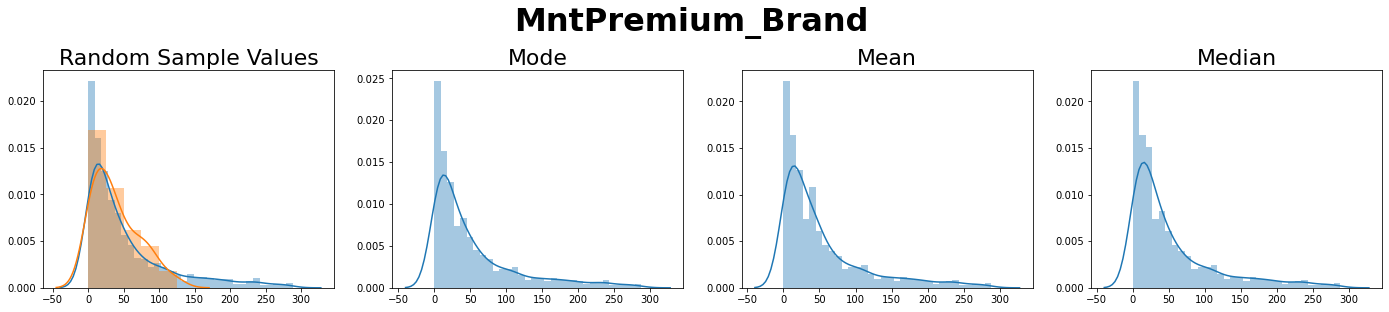

          Original  Random_Vals         Mode         Mean       Median
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean     60.741644    53.386440    52.604144    53.434768    53.099144
std      76.748258    60.672757    60.886857    60.468292    60.578193
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%      12.000000    11.000000    11.000000    12.000000    12.000000
50%      32.000000    30.000000    29.500000    32.000000    29.500000
75%      76.000000    71.000000    69.000000    69.000000    69.000000
max     460.000000   288.000000   288.000000   288.000000   288.000000 



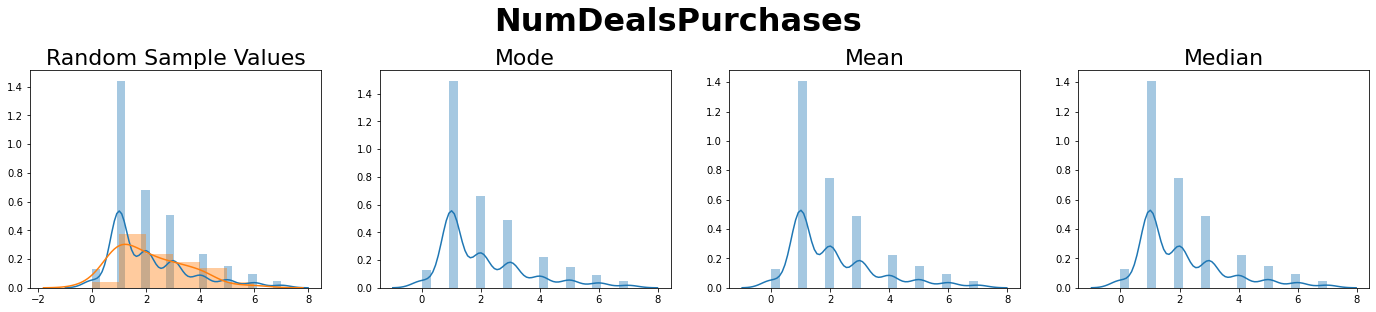

          Original  Random_Vals         Mode         Mean       Median
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean      2.280000     2.101000     2.072000     2.098164     2.097500
std       1.872259     1.504969     1.500314     1.490299     1.490337
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       1.000000     1.000000     1.000000     1.000000     1.000000
50%       2.000000     2.000000     2.000000     2.000000     2.000000
75%       3.000000     3.000000     3.000000     3.000000     3.000000
max      13.000000     7.000000     7.000000     7.000000     7.000000 



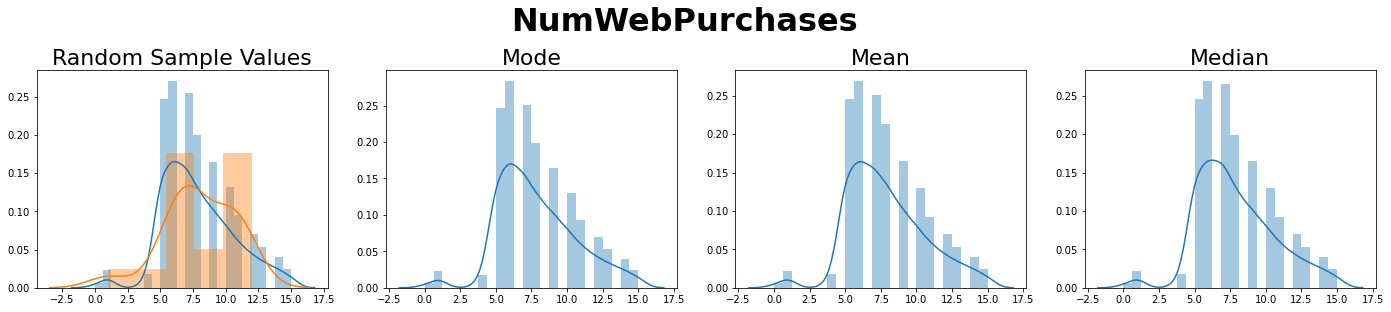

          Original  Random_Vals         Mode         Mean       Median
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean      8.081000     7.903000     7.885000     7.902119     7.894000
std       3.320234     2.738127     2.732491     2.726577     2.727908
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       6.000000     6.000000     6.000000     6.000000     6.000000
50%       7.000000     7.000000     7.000000     7.000000     7.000000
75%      10.000000    10.000000    10.000000    10.000000    10.000000
max      30.000000    15.000000    15.000000    15.000000    15.000000 



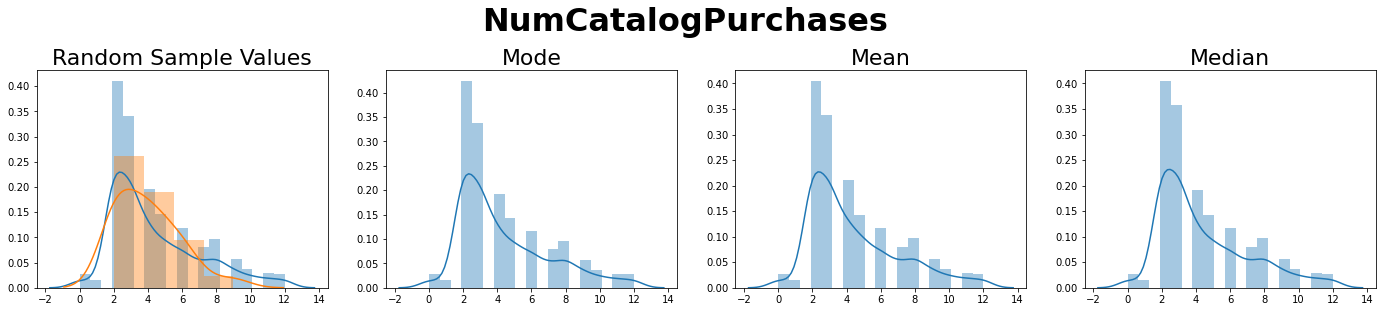

          Original  Random_Vals         Mode         Mean       Median
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean      4.505000     4.396500     4.373000     4.401822     4.385000
std       2.810503     2.657973     2.662784     2.649903     2.654298
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       2.000000     2.000000     2.000000     2.000000     2.000000
50%       4.000000     3.000000     3.000000     4.000000     3.000000
75%       6.000000     6.000000     6.000000     6.000000     6.000000
max      13.000000    12.000000    12.000000    12.000000    12.000000 



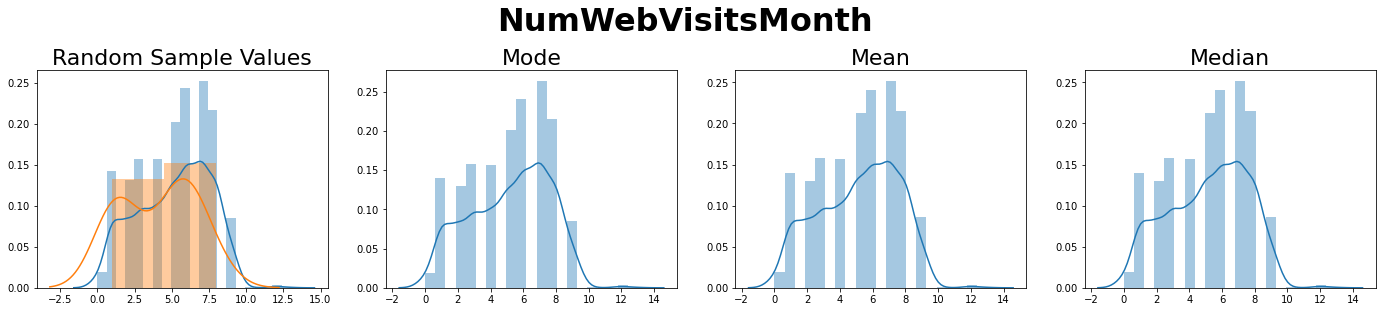

          Original  Random_Vals         Mode         Mean       Median
count  2000.000000   2000.00000  2000.000000  2000.000000  2000.000000
mean      5.231000      5.14750     5.169500     5.155668     5.154500
std       2.570203      2.42728     2.421715     2.416479     2.416516
min       0.000000      0.00000     0.000000     0.000000     0.000000
25%       3.000000      3.00000     3.000000     3.000000     3.000000
50%       6.000000      5.00000     6.000000     5.155668     5.000000
75%       7.000000      7.00000     7.000000     7.000000     7.000000
max      18.000000     13.00000    13.000000    13.000000    13.000000 



In [19]:
# Iterate through the column we have saved in our outliers dictionary. This way we already skip categorical columns.
for column in common_outlier_indices_train.keys():
    
    # Create an empty DataFrame to store descriptive statistics in.
    descriptor = pd.DataFrame()
    
    # Concatenate descriptive statistics from original data to empty DatFrame row-wise.
    descriptor = pd.concat([descriptor, x_train[column].describe()], axis=1)

    # Get outlier indices for current column.
    iqr_indices = iqr_outlier_indices_train[column]
    common_indices = common_outlier_indices_train[column]
    
    # Create a copy of the current column and drop all outliers.
    trimmed_column_copy = x_train[column].copy().drop(iqr_indices)

    # Get the number of common outliers we have for the current column.
    n_common_outliers = len(common_indices)
    
    # Sanity check: does the number of observations without outliers plus the number of outliers add up to 2500?
    assert trimmed_column_copy.shape[0] + len(iqr_indices) == len(x_train)
    
    # Randomly select values from the current column, up to the number of outliers the current column has.
    random_sample_values = random.choices(population=trimmed_column_copy.values, k=n_common_outliers)

    # Get the mode of the current column; if the distribution is multimodal, use the average of all modes.
    mode = trimmed_column_copy.mode()[0] if len(trimmed_column_copy.mode()) == 1 else trimmed_column_copy.mode().mean()

    # Get the mean of the current column.
    mean = trimmed_column_copy.mean()

    # Get the median of the current column.
    median = trimmed_column_copy.median()
    
    # Itialize a new figure.
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 4))
    
    # Iterate through the different metrics and replace outliers with each metric type.
    metrics = [random_sample_values, mode, mean, median]
    metric_names = ['Random Sample Values', 'Mode', 'Mean', 'Median']
    
    for n, (metric, name) in enumerate(zip(metrics, metric_names)):
        
        # Create a copy of the current column so we don't set any values permanently to the original DataFrame.
        column_copy = x_train[column].copy()

        # Replace the outliers with the current method's values.
        column_copy.loc[common_indices] = metric
        
        # KDE (kernel density estimate, or probability density function), normalizes the scale of the plots
        # so that the area under the curve sums up to 1; the highest point represents
        # the point where the probability is highest of finding an observation.
        sns.distplot(column_copy,
#                            kde=False,
                           ax=axes[n]
                          )
        
        axes[n].set_title(name, size=22)
        axes[n].set_xlabel('')
        
        # Concatenate descriptive statistics from substituted data to descriptor DatFrame row-wise.
        descriptor = pd.concat([descriptor, column_copy.describe()], axis=1)

    # Draw histogram to inspect the distribution of generated random values.
    sns.distplot(random_sample_values,
#                        kde=False,
                       ax=axes[0]
                      )
    
    # Draw a title for the whole figure.
    plt.suptitle(column, y=1.10, size=32, weight='bold')

    plt.show()
    plt.close()
    
    # Rename columns from the descriptor DataFrame.
    descriptor.columns = ['Original', 'Random_Vals', 'Mode', 'Mean', 'Median']
    print(descriptor, '\n')

From these results, we can observe that no particular metric disrupts the distribution of any of our features. Therefore, we choose to apply random sample values to replace the outliers, since this method generates more organic values for imputation.

### Replace outliers

Number of leftover outliers: 0


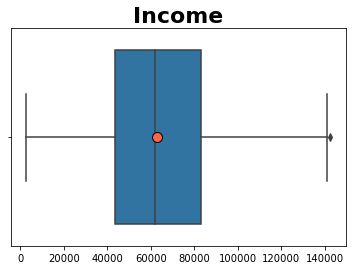

Number of leftover outliers: 12


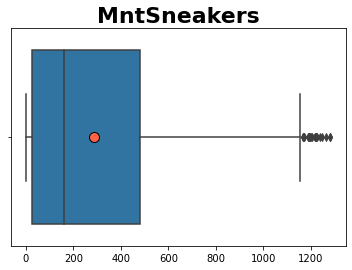

Number of leftover outliers: 150


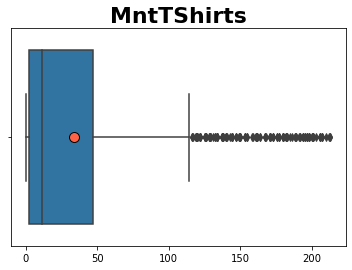

Number of leftover outliers: 129


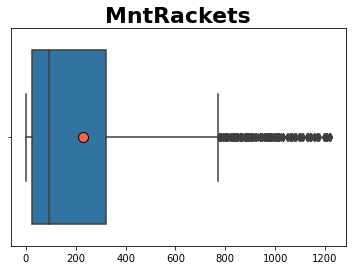

Number of leftover outliers: 128


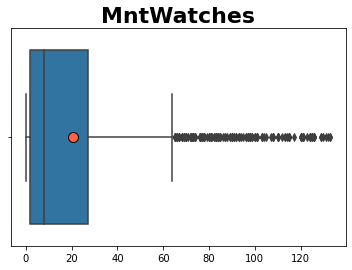

Number of leftover outliers: 169


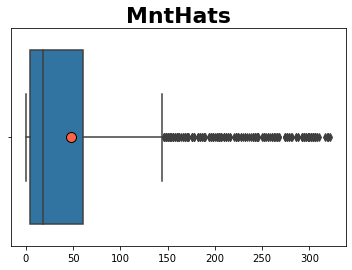

Number of leftover outliers: 139


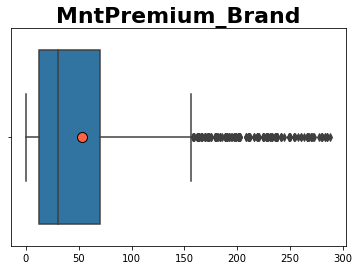

Number of leftover outliers: 29


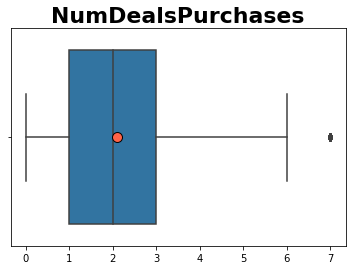

Number of leftover outliers: 0


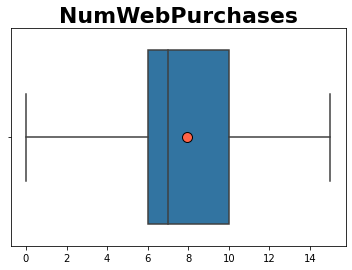

Number of leftover outliers: 0


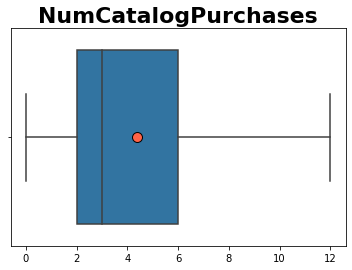

Number of leftover outliers: 0


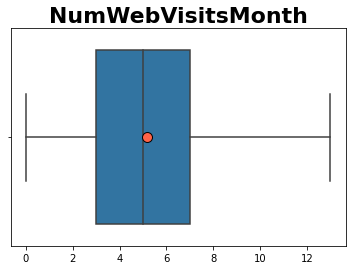

In [20]:
# Iterate through the column we have saved in our outliers dictionary. This way we already skip categorical columns.
for column in common_outlier_indices_train.keys():

    # Get outlier indices for current column.
    iqr_indices = iqr_outlier_indices_train[column]
    common_indices = common_outlier_indices_train[column]
    
    # Create a copy of the current column and drop all outliers.
    trimmed_column_copy = x_train[column].copy().drop(iqr_indices)

    # Get the number of common outliers we have for the current column.
    n_common_outliers = len(common_indices)
    print('Number of leftover outliers:', len(iqr_indices) - n_common_outliers)
    
    # Randomly select values from our current column, up to the number of outliers the current column has.
    random_sample_values = random.choices(population=trimmed_column_copy.values, k=n_common_outliers)

    # Replace the outliers with the current method's values in the training set.
    x_train.loc[common_indices, column] = random_sample_values

    # Initialize a new figure.
    fig, ax = plt.subplots()

    # Draw a boxplot for the current column.
    sns.boxplot(x_train[column],
                        orient='horizontal',
                        showmeans=True,
                        meanprops={'markerfacecolor': 'tomato', 'markeredgecolor': 'black', 'markersize': 10, 'marker': 'o'}
                       )

    # Format axis elements.
    ax.set_xlabel('')
    ax.set_title(column, size=22, weight='bold')
    
    plt.show()
    plt.close()

In [21]:
# Let's apply the replacement to the test set now.

# Iterate through the column we have saved in our outliers dictionary. This way we already skip categorical columns.
for column in common_outlier_indices_test.keys():

    # Get outlier indices for current column.
    iqr_indices = iqr_outlier_indices_test[column]
    common_indices = common_outlier_indices_test[column]
    
    # Create a copy of the current column and drop all outliers.
    trimmed_column_copy = x_test[column].copy().drop(iqr_indices)

    # Get the number of common outliers we have for the current column.
    n_common_outliers = len(common_indices)
    print('Number of leftover outliers:', len(iqr_indices) - n_common_outliers)
    
    # Randomly select values from our current column, up to the number of outliers the current column has.
    random_sample_values = random.choices(population=trimmed_column_copy.values, k=n_common_outliers)

    # Replace the outliers with the current method's values in the training set.
    x_test.loc[common_indices, column] = random_sample_values

Number of leftover outliers: 0
Number of leftover outliers: 2
Number of leftover outliers: 28
Number of leftover outliers: 24
Number of leftover outliers: 29
Number of leftover outliers: 30
Number of leftover outliers: 17
Number of leftover outliers: 8
Number of leftover outliers: 0
Number of leftover outliers: 0


Because after this replacement, the features `MntSneakers` and `NumDealsPurchases` have very few outlier observations (considered here from the upper whiskers of the boxplots), we decided to replace those leftover observations as well.

### Second round of outliers substitution

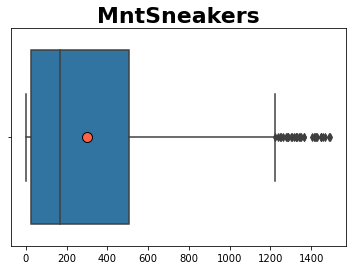

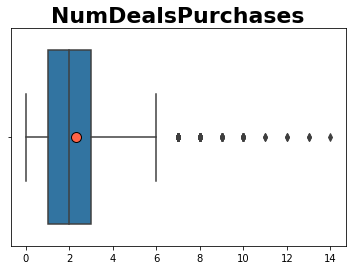

In [22]:
# Features in which to replace remaining outliers.
second_replacement = ['MntSneakers', 'NumDealsPurchases']

for column in second_replacement:
    
    # Because we have replaced some outliers in the original data, the distribution will now be slightly different,
    # which means that we need to recalculate the IQR bounds in order to be accurate.
    
    # Get first and third quartiles.
    q1 = x_train[column].quantile(0.25)
    q3 = x_train[column].quantile(0.75)
    
    # Set threshold for calculating lower and upper limits for outlier detection.
    threshold = 1.5
    
    # Calculate the upper bound.
    upper_bound = q3 + (q3 - q1) * threshold
    
    # Get outlier indices.
    upper_indices = x_train[column][x_train[column] > upper_bound].index
    
    # Create a copy of the current column and drop all outliers.
    trimmed_column_copy = x_train[column].copy().drop(upper_indices)

    # Get the number of common outliers we have for the current column.
    n_leftover_outliers = len(upper_indices)

    # Randomly select values from our current column, up to the number of outliers the current column has.
    random_sample_values = random.choices(population=trimmed_column_copy.values, k=n_leftover_outliers)

    # Replace the outliers with the current method's values.
    x_train.loc[upper_indices, column] = random_sample_values
    
    # Initialize a new figure.
    fig, ax = plt.subplots()

    # Draw a boxplot for the current column.
    sns.boxplot(data_df[column],
                       orient='horizontal',
                       showmeans=True,
                       meanprops={'markerfacecolor': 'tomato', 'markeredgecolor': 'black', 'markersize': 10, 'marker': 'o'}
                      )

    # Format axis elements.
    ax.set_xlabel('')
    ax.set_title(column, size=22, weight='bold')
    
    plt.show()
    plt.close()

In [23]:
# Again for the test set.

# Features in which to replace remaining outliers.
second_replacement = ['MntSneakers', 'NumDealsPurchases']

for column in second_replacement:
    
    # Because we have replaced some outliers in the original data, the distribution will now be slightly different,
    # which means that we need to recalculate the IQR bounds in order to be accurate.
    
    # Get first and third quartiles.
    q1 = x_test[column].quantile(0.25)
    q3 = x_test[column].quantile(0.75)
    
    # Set threshold for calculating lower and upper limits for outlier detection.
    threshold = 1.5
    
    # Calculate the upper bound.
    upper_bound = q3 + (q3 - q1) * threshold
    
    # Get outlier indices.
    upper_indices = x_test[column][x_test[column] > upper_bound].index
    
    # Create a copy of the current column and drop all outliers.
    trimmed_column_copy = x_test[column].copy().drop(upper_indices)

    # Get the number of common outliers we have for the current column.
    n_leftover_outliers = len(upper_indices)

    # Randomly select values from our current column, up to the number of outliers the current column has.
    random_sample_values = random.choices(population=trimmed_column_copy.values, k=n_leftover_outliers)

    # Replace the outliers with the current method's values.
    x_test.loc[upper_indices, column] = random_sample_values

<a class="anchor" id="feature-engineering"></a>
# 4. Feature Engineering

Feature engineering allows building features for each label while filtering the used data, since without relevant features, an accurate model cannot be trained.

### Total amount each customer spent: 'Total_Spent'

In [24]:
# Sum amount spent on each category of products to get 'Total_Spent'.
x_train['Total_Spent'] = x_train['MntTShirts'] + x_train['MntRackets'] + x_train['MntWatches'] + x_train['MntHats'] + x_train['MntSneakers']
x_test['Total_Spent'] = x_test['MntTShirts'] + x_test['MntRackets'] + x_test['MntWatches'] + x_test['MntHats'] + x_test['MntSneakers']

x_train.loc[:, ['MntTShirts', 'MntRackets', 'MntWatches', 'MntHats', 'MntSneakers', 'Total_Spent']]

,MntTShirts,MntRackets,MntWatches,MntHats,MntSneakers,Total_Spent
0,0.0,87.0,0.0,0.0,425.0,512.0
1,68.0,282.0,18.0,38.0,369.0,775.0
2,20.0,17.0,17.0,0.0,2.0,56.0
3,120.0,326.0,20.0,160.0,757.0,1383.0
4,119.0,621.0,3.0,61.0,621.0,1425.0
...,...,...,...,...,...,...
1995,3.0,33.0,2.0,0.0,226.0,264.0
1996,2.0,26.0,3.0,8.0,4.0,43.0
1997,2.0,48.0,1.0,2.0,144.0,197.0
1998,2.0,32.0,0.0,2.0,22.0,58.0


### Percentage of money each customer spent in each product category

In [25]:
mnt_spent = ['MntTShirts', 'MntRackets', 'MntWatches', 'MntHats', 'MntSneakers']
percent_spent = ['PercentMntTShirts', 'PercentMntRackets', 'PercentMntWatches', 'PercentMntHats', 'PercentMntSneakers']

for percent, mnt in zip(percent_spent, mnt_spent):
    
    x_train[percent] = x_train[mnt] / x_train['Total_Spent'] * 100
    x_train[percent].fillna(value=0, inplace=True)
    
    x_test[percent] = x_test[mnt] / x_test['Total_Spent'] * 100
    x_test[percent].fillna(value=0, inplace=True)

In [26]:
x_train['Total_PercentSpent'] = x_train.loc[:, ['PercentMntTShirts', 'PercentMntRackets', 'PercentMntWatches', 'PercentMntHats', 'PercentMntSneakers']].sum(axis=1)
x_test['Total_PercentSpent'] = x_test.loc[:, ['PercentMntTShirts', 'PercentMntRackets', 'PercentMntWatches', 'PercentMntHats', 'PercentMntSneakers']].sum(axis=1)

x_train.loc[:, ['MntTShirts', 'MntRackets', 'MntWatches', 'MntHats', 'MntSneakers', 'Total_Spent', 'PercentMntTShirts', 'PercentMntRackets', 'PercentMntWatches', 'PercentMntHats', 'PercentMntSneakers', 'Total_PercentSpent']]

,MntTShirts,MntRackets,MntWatches,MntHats,MntSneakers,Total_Spent,PercentMntTShirts,PercentMntRackets,PercentMntWatches,PercentMntHats,PercentMntSneakers,Total_PercentSpent
0,0.0,87.0,0.0,0.0,425.0,512.0,0.000000,16.992188,0.000000,0.000000,83.007812,100.0
1,68.0,282.0,18.0,38.0,369.0,775.0,8.774194,36.387097,2.322581,4.903226,47.612903,100.0
2,20.0,17.0,17.0,0.0,2.0,56.0,35.714286,30.357143,30.357143,0.000000,3.571429,100.0
3,120.0,326.0,20.0,160.0,757.0,1383.0,8.676790,23.571945,1.446132,11.569053,54.736081,100.0
4,119.0,621.0,3.0,61.0,621.0,1425.0,8.350877,43.578947,0.210526,4.280702,43.578947,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3.0,33.0,2.0,0.0,226.0,264.0,1.136364,12.500000,0.757576,0.000000,85.606061,100.0
1996,2.0,26.0,3.0,8.0,4.0,43.0,4.651163,60.465116,6.976744,18.604651,9.302326,100.0
1997,2.0,48.0,1.0,2.0,144.0,197.0,1.015228,24.365482,0.507614,1.015228,73.096447,100.0
1998,2.0,32.0,0.0,2.0,22.0,58.0,3.448276,55.172414,0.000000,3.448276,37.931034,100.0


### Sum of each customer's purchases across platforms: 'Total_Purchases'

In [27]:
x_train['Total_Purchases'] = x_train['NumWebPurchases'] + x_train['NumCatalogPurchases'] + x_train['NumStorePurchases']
x_test['Total_Purchases'] = x_test['NumWebPurchases'] + x_test['NumCatalogPurchases'] + x_test['NumStorePurchases']

x_train.loc[:, ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases']]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases
0,10.0,4.0,9.0,23.0
1,10.0,4.0,12.0,26.0
2,6.0,2.0,4.0,12.0
3,13.0,8.0,13.0,34.0
4,8.0,12.0,11.0,31.0
...,...,...,...,...
1995,8.0,4.0,6.0,18.0
1996,5.0,2.0,4.0,11.0
1997,7.0,3.0,6.0,16.0
1998,5.0,3.0,4.0,12.0


### Subtract Premium Brands from Total_Spent: 'MntMainstream' products.

In [28]:
# Subtract amount spent on Premium Brands from total spent amount spent in mainstream articles.
x_train['MntMainstream'] = x_train['Total_Spent'] - x_train['MntPremium_Brand']
x_test['MntMainstream'] = x_test['Total_Spent'] - x_test['MntPremium_Brand']

x_train.loc[:, ['MntMainstream', 'MntPremium_Brand', 'Total_Spent']]

,MntMainstream,MntPremium_Brand,Total_Spent
0,436.0,76.0,512.0
1,750.0,25.0,775.0
2,27.0,29.0,56.0
3,1368.0,15.0,1383.0
4,1322.0,103.0,1425.0
...,...,...,...
1995,241.0,23.0,264.0
1996,35.0,8.0,43.0
1997,167.0,30.0,197.0
1998,54.0,4.0,58.0


### Percentage spent per product category (Mainstream vs Premium)

In [29]:
x_train['PercentSpentMainstream'] = x_train['MntMainstream'] / x_train['Total_Spent'] * 100
x_train['PercentSpentPremium_Brand'] = x_train['MntPremium_Brand'] / x_train['Total_Spent'] * 100

x_test['PercentSpentMainstream'] = x_test['MntMainstream'] / x_test['Total_Spent'] * 100
x_test['PercentSpentPremium_Brand'] = x_test['MntPremium_Brand'] / x_test['Total_Spent'] * 100

x_train.loc[:, ['MntMainstream', 'MntPremium_Brand', 'Total_Spent', 'PercentSpentMainstream', 'PercentSpentPremium_Brand']]

,MntMainstream,MntPremium_Brand,Total_Spent,PercentSpentMainstream,PercentSpentPremium_Brand
0,436.0,76.0,512.0,85.156250,14.843750
1,750.0,25.0,775.0,96.774194,3.225806
2,27.0,29.0,56.0,48.214286,51.785714
3,1368.0,15.0,1383.0,98.915401,1.084599
4,1322.0,103.0,1425.0,92.771930,7.228070
...,...,...,...,...,...
1995,241.0,23.0,264.0,91.287879,8.712121
1996,35.0,8.0,43.0,81.395349,18.604651
1997,167.0,30.0,197.0,84.771574,15.228426
1998,54.0,4.0,58.0,93.103448,6.896552


### Average spent per mainstream product: 'AvgSpentPerMainstreamPurchase'

In [30]:
x_train['AvgSpentPerMainstreamPurchase'] = x_train['MntMainstream'] / x_train['Total_Purchases']
x_test['AvgSpentPerMainstreamPurchase'] = x_test['MntMainstream'] / x_test['Total_Purchases']

x_train.loc[:, ['MntMainstream', 'Total_Purchases', 'AvgSpentPerMainstreamPurchase']]

,MntMainstream,Total_Purchases,AvgSpentPerMainstreamPurchase
0,436.0,23.0,18.956522
1,750.0,26.0,28.846154
2,27.0,12.0,2.250000
3,1368.0,34.0,40.235294
4,1322.0,31.0,42.645161
...,...,...,...
1995,241.0,18.0,13.388889
1996,35.0,11.0,3.181818
1997,167.0,16.0,10.437500
1998,54.0,12.0,4.500000


### Average spent per purchase: 'AvgSpentPerPurchase'

In [31]:
x_train['AvgSpentPerPurchase'] = x_train['Total_Spent'] / x_train['Total_Purchases']
x_test['AvgSpentPerPurchase'] = x_test['Total_Spent'] / x_test['Total_Purchases']

x_train.loc[:, ['Total_Spent', 'Total_Purchases', 'AvgSpentPerPurchase']]

,Total_Spent,Total_Purchases,AvgSpentPerPurchase
0,512.0,23.0,22.260870
1,775.0,26.0,29.807692
2,56.0,12.0,4.666667
3,1383.0,34.0,40.676471
4,1425.0,31.0,45.967742
...,...,...,...
1995,264.0,18.0,14.666667
1996,43.0,11.0,3.909091
1997,197.0,16.0,12.312500
1998,58.0,12.0,4.833333


### Percentage of purchases done through each sales channel

In [32]:
num_purchases = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
percent_purchases = ['PercentWebPurchases', 'PercentCatalogPurchases', 'PercentStorePurchases']

for p_purchase, n_purchase in zip(percent_purchases, num_purchases):
    
    x_train[p_purchase] = x_train[n_purchase] / x_train['Total_Purchases'] * 100
    x_train[p_purchase].fillna(value=0, inplace=True)
    
    x_test[p_purchase] = x_test[n_purchase] / x_test['Total_Purchases'] * 100
    x_test[p_purchase].fillna(value=0, inplace=True)

In [33]:
# Round the column value to zero decimal places and convert to integer.
x_train.loc[:, percent_purchases].applymap(lambda row: int(round(row, 0)))
x_test.loc[:, percent_purchases].applymap(lambda row: int(round(row, 0)))

,PercentWebPurchases,PercentCatalogPurchases,PercentStorePurchases
0,46,23,31
1,41,22,37
2,47,27,27
3,46,17,38
4,50,0,50
...,...,...,...
495,41,24,35
496,33,24,43
497,44,19,38
498,50,27,23


### Percentage of total purchases that were made using deals: 'PercentDealsPurchases'

In [34]:
x_train['PercentDealsPurchases'] = x_train['NumDealsPurchases'] / x_train['Total_Purchases'] * 100
x_train['PercentDealsPurchases'].fillna(value=0, inplace=True)

x_test['PercentDealsPurchases'] = x_test['NumDealsPurchases'] / x_test['Total_Purchases'] * 100
x_test['PercentDealsPurchases'].fillna(value=0, inplace=True)

x_train.loc[:, ['NumDealsPurchases', 'Total_Purchases', 'PercentDealsPurchases']]

,NumDealsPurchases,Total_Purchases,PercentDealsPurchases
0,4.0,23.0,17.391304
1,1.0,26.0,3.846154
2,3.0,12.0,25.000000
3,5.0,34.0,14.705882
4,1.0,31.0,3.225806
...,...,...,...
1995,5.0,18.0,27.777778
1996,2.0,11.0,18.181818
1997,4.0,16.0,25.000000
1998,2.0,12.0,16.666667


### Number of years a customer has been registered: 'Cust_Years_Registered'

In [35]:
x_train['Cust_Years_Registered'] = x_train['Dt_Customer'].apply(lambda row: dt.datetime.today().year - row.year)
x_test['Cust_Years_Registered'] = x_test['Dt_Customer'].apply(lambda row: dt.datetime.today().year - row.year)

x_train[['Dt_Customer', 'Cust_Years_Registered']]

,Dt_Customer,Cust_Years_Registered
0,2016-02-11,4
1,2015-08-26,5
2,2015-11-18,5
3,2015-08-13,5
4,2016-10-13,4
...,...,...
1995,2015-09-21,5
1996,2016-02-27,4
1997,2015-11-09,5
1998,2016-07-23,4


### Number of purchases each customer makes per year: 'YearlyAvgPurchases'

In [36]:
# Frequency of orders for each customer, per year.
x_train['YearlyAvgPurchases'] = x_train['Total_Purchases'] / x_train['Cust_Years_Registered']
x_test['YearlyAvgPurchases'] = x_test['Total_Purchases'] / x_test['Cust_Years_Registered']

x_train.loc[:, ['Total_Purchases', 'Cust_Years_Registered', 'YearlyAvgPurchases']]

,Total_Purchases,Cust_Years_Registered,YearlyAvgPurchases
0,23.0,4,5.75
1,26.0,5,5.20
2,12.0,5,2.40
3,34.0,5,6.80
4,31.0,4,7.75
...,...,...,...
1995,18.0,5,3.60
1996,11.0,4,2.75
1997,16.0,5,3.20
1998,12.0,4,3.00


### Fraction of web visits that turned into web purchases: 'WebPurchaseRate'

In [37]:
# Get the average number of purchases made per month.
yearly_web_purchases = x_train['NumWebPurchases'] / x_train['Cust_Years_Registered']
x_train['MonthlyWebPurchases'] = yearly_web_purchases / 12

yearly_web_purchases = x_test['NumWebPurchases'] / x_test['Cust_Years_Registered']
x_test['MonthlyWebPurchases'] = yearly_web_purchases / 12

In [38]:
# Get the fraction of web visits that turned into web purchases.
x_train['WebPurchaseRate'] = x_train['MonthlyWebPurchases'] / x_train['NumWebVisitsMonth'] * 100
x_train.loc[x_train['NumWebVisitsMonth']==0, 'WebPurchaseRate'] = 0

x_test['WebPurchaseRate'] = x_test['MonthlyWebPurchases'] / x_test['NumWebVisitsMonth'] * 100
x_test.loc[x_test['NumWebVisitsMonth']==0, 'WebPurchaseRate'] = 0

x_train.loc[:, ['NumWebVisitsMonth', 'MonthlyWebPurchases', 'WebPurchaseRate']]

,NumWebVisitsMonth,MonthlyWebPurchases,WebPurchaseRate
0,6.0,0.208333,3.472222
1,7.0,0.166667,2.380952
2,7.0,0.100000,1.428571
3,6.0,0.216667,3.611111
4,3.0,0.166667,5.555556
...,...,...,...
1995,8.0,0.133333,1.666667
1996,9.0,0.104167,1.157407
1997,6.0,0.116667,1.944444
1998,6.0,0.104167,1.736111


### Calculate customer age from Year_Birth: 'Age'

In [39]:
# Get the current year.
current_year = dt.datetime.today().year

# Subtract the current year to the customer's year of birth.
x_train['Age'] = current_year - x_train['Year_Birth']
x_test['Age'] = current_year - x_test['Year_Birth']

x_train[['Year_Birth', 'Age']]

,Year_Birth,Age
0,1965.0,55.0
1,1968.0,52.0
2,1977.0,43.0
3,1954.0,66.0
4,1959.0,61.0
...,...,...
1995,1960.0,60.0
1996,1988.0,32.0
1997,1953.0,67.0
1998,1968.0,52.0


### Categorized Age: 'Age_Range'

In [40]:
x_train['Age_Range'] = '[20, 29]'
x_train.loc[(x_train['Age'] > 29) & (x_train['Age'] <= 39), 'Age_Range'] = '[30, 39]'
x_train.loc[(x_train['Age'] > 39) & (x_train['Age'] <= 49), 'Age_Range'] = '[40, 49]'
x_train.loc[(x_train['Age'] > 49) & (x_train['Age'] <= 59), 'Age_Range'] = '[50, 59]'
x_train.loc[(x_train['Age'] > 59) & (x_train['Age'] <= 69), 'Age_Range'] = '[60, 69]'
x_train.loc[x_train['Age'] > 69, 'Age_Range'] = '[70+]'

x_test['Age_Range'] = '[20, 29]'
x_test.loc[(x_test['Age'] > 29) & (x_test['Age'] <= 39), 'Age_Range'] = '[30, 39]'
x_test.loc[(x_test['Age'] > 39) & (x_test['Age'] <= 49), 'Age_Range'] = '[40, 49]'
x_test.loc[(x_test['Age'] > 49) & (x_test['Age'] <= 59), 'Age_Range'] = '[50, 59]'
x_test.loc[(x_test['Age'] > 59) & (x_test['Age'] <= 69), 'Age_Range'] = '[60, 69]'
x_test.loc[x_test['Age'] > 69, 'Age_Range'] = '[70+]'

x_train.loc[:, ['Age', 'Age_Range']]

,Age,Age_Range
0,55.0,"[50, 59]"
1,52.0,"[50, 59]"
2,43.0,"[40, 49]"
3,66.0,"[60, 69]"
4,61.0,"[60, 69]"
...,...,...
1995,60.0,"[60, 69]"
1996,32.0,"[30, 39]"
1997,67.0,"[60, 69]"
1998,52.0,"[50, 59]"


### One-Hot Encoding 'Education'

In [41]:
# Rename value '2n Cycle' to 'Cycle', so that after one-hot encoding the first column dropped is 'Basic' instead.
x_train['Education'].replace({'2n Cycle': 'Cycle'}, inplace=True)
x_test['Education'].replace({'2n Cycle': 'Cycle'}, inplace=True)

x_train['Education']

0       Graduation
1       Graduation
2            Basic
3       Graduation
4            Cycle
           ...    
1995    Graduation
1996    Graduation
1997    Graduation
1998        Master
1999         Cycle
Name: Education, Length: 2000, dtype: object

In [42]:
# Perform one-hot encoding, and drop the first colum ('Basic') to avoid multicollinearity problems.
education_one_hot_encoded_train = pd.get_dummies(x_train['Education'], drop_first=True)
education_one_hot_encoded_train.rename(columns={'Cycle': '2nd Cycle'}, inplace=True)

education_one_hot_encoded_test = pd.get_dummies(x_test['Education'], drop_first=True)
education_one_hot_encoded_test.rename(columns={'Cycle': '2nd Cycle'}, inplace=True)

education_one_hot_encoded_train

,2nd Cycle,Graduation,Master,PhD
0,0,1,0,0
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
1995,0,1,0,0
1996,0,1,0,0
1997,0,1,0,0
1998,0,0,1,0


In [43]:
# Concatenate the one-hot encoded columns to the original DataFrame.
x_train = pd.concat([x_train, education_one_hot_encoded_train], axis=1)
x_test = pd.concat([x_test, education_one_hot_encoded_test], axis=1)

x_train

,Custid,Year_Birth,Income,Kidhome,Teenhome,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,...,Cust_Years_Registered,YearlyAvgPurchases,MonthlyWebPurchases,WebPurchaseRate,Age,Age_Range,2nd Cycle,Graduation,Master,PhD
0,10042366.0,1965.0,64227.0,0.0,1.0,9.0,425.0,0.0,87.0,0.0,...,4,5.75,0.208333,3.472222,55.0,"[50, 59]",0,1,0,0
1,10031646.0,1968.0,65261.0,1.0,1.0,46.0,369.0,68.0,282.0,18.0,...,5,5.20,0.166667,2.380952,52.0,"[50, 59]",0,1,0,0
2,10022794.0,1977.0,22649.0,1.0,0.0,98.0,2.0,20.0,17.0,17.0,...,5,2.40,0.100000,1.428571,43.0,"[40, 49]",0,0,0,0
3,10030678.0,1954.0,80934.0,0.0,1.0,63.0,757.0,120.0,326.0,20.0,...,5,6.80,0.216667,3.611111,66.0,"[60, 69]",0,1,0,0
4,10011754.0,1959.0,87981.0,0.0,0.0,47.0,621.0,119.0,621.0,3.0,...,4,7.75,0.166667,5.555556,61.0,"[60, 69]",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10038194.0,1960.0,52479.0,1.0,1.0,33.0,226.0,3.0,33.0,2.0,...,5,3.60,0.133333,1.666667,60.0,"[60, 69]",0,1,0,0
1996,10026790.0,1988.0,26755.0,1.0,0.0,74.0,4.0,2.0,26.0,3.0,...,4,2.75,0.104167,1.157407,32.0,"[30, 39]",0,1,0,0
1997,10007322.0,1953.0,52953.0,2.0,1.0,42.0,144.0,2.0,48.0,1.0,...,5,3.20,0.116667,1.944444,67.0,"[60, 69]",0,1,0,0
1998,10037654.0,1968.0,38856.0,1.0,1.0,80.0,22.0,2.0,32.0,0.0,...,4,3.00,0.104167,1.736111,52.0,"[50, 59]",0,0,1,0


### One-Hot Encoding 'Marital_Status'

In [44]:
# Perform one-hot encoding, and drop the first column ('Divorced') to avoid multicollinearity problems.
marital_status_one_hot_encoded_train = pd.get_dummies(x_train['Marital_Status'], drop_first=True)
marital_status_one_hot_encoded_test = pd.get_dummies(x_test['Marital_Status'], drop_first=True)

marital_status_one_hot_encoded_train

,Married,Single,Together,Widow
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
1995,0,1,0,0
1996,0,0,1,0
1997,0,1,0,0
1998,0,1,0,0


In [45]:
# Concatenate the one-hot encoded columns to the original DataFrame.
x_train = pd.concat([x_train, marital_status_one_hot_encoded_train], axis=1)
x_test = pd.concat([x_test, marital_status_one_hot_encoded_test], axis=1)

x_train

,Custid,Year_Birth,Income,Kidhome,Teenhome,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,...,Age,Age_Range,2nd Cycle,Graduation,Master,PhD,Married,Single,Together,Widow
0,10042366.0,1965.0,64227.0,0.0,1.0,9.0,425.0,0.0,87.0,0.0,...,55.0,"[50, 59]",0,1,0,0,0,0,1,0
1,10031646.0,1968.0,65261.0,1.0,1.0,46.0,369.0,68.0,282.0,18.0,...,52.0,"[50, 59]",0,1,0,0,0,0,1,0
2,10022794.0,1977.0,22649.0,1.0,0.0,98.0,2.0,20.0,17.0,17.0,...,43.0,"[40, 49]",0,0,0,0,0,1,0,0
3,10030678.0,1954.0,80934.0,0.0,1.0,63.0,757.0,120.0,326.0,20.0,...,66.0,"[60, 69]",0,1,0,0,0,0,1,0
4,10011754.0,1959.0,87981.0,0.0,0.0,47.0,621.0,119.0,621.0,3.0,...,61.0,"[60, 69]",1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10038194.0,1960.0,52479.0,1.0,1.0,33.0,226.0,3.0,33.0,2.0,...,60.0,"[60, 69]",0,1,0,0,0,1,0,0
1996,10026790.0,1988.0,26755.0,1.0,0.0,74.0,4.0,2.0,26.0,3.0,...,32.0,"[30, 39]",0,1,0,0,0,0,1,0
1997,10007322.0,1953.0,52953.0,2.0,1.0,42.0,144.0,2.0,48.0,1.0,...,67.0,"[60, 69]",0,1,0,0,0,1,0,0
1998,10037654.0,1968.0,38856.0,1.0,1.0,80.0,22.0,2.0,32.0,0.0,...,52.0,"[50, 59]",0,0,1,0,0,1,0,0


### Create temporary Series to later calculate family size: 'Marital_Size'
Marital_Size encodes how many adults are in the household of each client.

In [46]:
# Create a mapping for the labels we want to replace.
marital_size = {'Single': 1, 'Divorced': 1, 'Married': 2, 'Together': 2, 'Widow': 1}

# Create temporary pandas.Series holding the numericial mapping of 'Marital_Status'.
marital_size_train_series = x_train['Marital_Status'].replace(marital_size)
marital_size_test_series = x_test['Marital_Status'].replace(marital_size)

marital_size_train_series

0       2
1       2
2       1
3       2
4       2
       ..
1995    1
1996    2
1997    1
1998    1
1999    2
Name: Marital_Status, Length: 2000, dtype: int64

### Total number of people in a given customer's household: 'Family_Size'

The family size is assumed to be the sum of adults, teens, and kids a customer has in its household.
<br>We are therefore assuming that there are no other relatives or dependents living in the same household.

In [47]:
x_train['Family_Size'] = x_train['Kidhome'] + x_train['Teenhome'] + marital_size_train_series
x_test['Family_Size'] = x_test['Kidhome'] + x_test['Teenhome'] + marital_size_test_series

x_train.loc[:, ['Marital_Status', 'Kidhome', 'Teenhome', 'Family_Size']]

,Marital_Status,Kidhome,Teenhome,Family_Size
0,Together,0.0,1.0,3.0
1,Together,1.0,1.0,4.0
2,Single,1.0,0.0,2.0
3,Together,0.0,1.0,3.0
4,Married,0.0,0.0,2.0
...,...,...,...,...
1995,Single,1.0,1.0,3.0
1996,Together,1.0,0.0,3.0
1997,Single,2.0,1.0,4.0
1998,Single,1.0,1.0,3.0


### Total number of accepted campaigns by each customer: 'MntAcceptedCmps' and 'PercentAcceptedCmps'

In [48]:
# Get amount of accepted campaigns.
x_train['MntAcceptedCmps'] = x_train['AcceptedCmp1'] + x_train['AcceptedCmp2'] + x_train['AcceptedCmp3'] + x_train['AcceptedCmp4'] + x_train['AcceptedCmp5']
x_test['MntAcceptedCmps'] = x_test['AcceptedCmp1'] + x_test['AcceptedCmp2'] + x_test['AcceptedCmp3'] + x_test['AcceptedCmp4'] + x_test['AcceptedCmp5']

# Convert column to integer data type.
x_train['MntAcceptedCmps'] = x_train['MntAcceptedCmps'].astype(int)
x_test['MntAcceptedCmps']  = x_test['MntAcceptedCmps'].astype(int)

# Get percentage of accepted campaigns.
x_train['PercentAcceptedCmps'] = x_train['MntAcceptedCmps'] / 5 * 100
x_test['PercentAcceptedCmps'] = x_test['MntAcceptedCmps'] / 5 * 100

# Convert column to integer data type.
x_train['PercentAcceptedCmps'] = x_train['PercentAcceptedCmps'].astype(int)
x_test['PercentAcceptedCmps'] = x_test['PercentAcceptedCmps'].astype(int)

x_train.loc[:, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'MntAcceptedCmps', 'PercentAcceptedCmps']]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,MntAcceptedCmps,PercentAcceptedCmps
0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0,0
1996,0.0,0.0,0.0,0.0,0.0,0,0
1997,0.0,1.0,0.0,0.0,0.0,1,20
1998,0.0,0.0,0.0,0.0,0.0,0,0


In [49]:
# Remove categorical columns that have just been one-hot encoded.
x_train.drop(columns=['Education', 'Marital_Status'], inplace=True)
x_test.drop(columns=['Education', 'Marital_Status'], inplace=True)

<a class="anchor" id="data-quality"></a>
# 5. Data Quality

A key requirement of data prediction is high-quality data, in terms of it being both accurate and not lacking basic information. Below we perform several checks on the integrity of our dataset.

### Age

In [50]:
# Are there odd values for the Age range?
print(sorted(x_train['Age'].unique()))
print(sorted(x_test['Age'].unique()))

[21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0]
[25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0]


### Total_Purchases

In [51]:
# Are there any customers that haven't purchased any product?
# Note: we are assuming that customers registered in our database must have purchased at least one product.
pandas_query = 'Total_Purchases==0'
columns_to_observe = ['Total_Purchases', 'Total_Spent']
x_train.query(pandas_query)[columns_to_observe]

,Total_Purchases,Total_Spent
116,0.0,4.0
209,0.0,3.0
234,0.0,10.0
345,0.0,8.0
570,0.0,7.0
1062,0.0,3.0
1386,0.0,2.0
1775,0.0,3.0


In [52]:
# Get indices where we observe the inconsistencies.
inconsistent_purchases_train = x_train.query('Total_Purchases==0').index
inconsistent_purchases_test = x_test.query('Total_Purchases==0').index

In [53]:
# Replace zeros in 'Total_Purchases' in the indices whose values were inconsistent.
x_train.loc[inconsistent_purchases_train, 'Total_Purchases'] = 1
x_test.loc[inconsistent_purchases_test, 'Total_Purchases'] = 1

x_train.loc[inconsistent_purchases_train, ['Total_Purchases', 'Total_Spent']]

,Total_Purchases,Total_Spent
116,1.0,4.0
209,1.0,3.0
234,1.0,10.0
345,1.0,8.0
570,1.0,7.0
1062,1.0,3.0
1386,1.0,2.0
1775,1.0,3.0


In [54]:
# Recompute AvgSpent-related columns which were derived from Total_Purchases.
x_train['AvgSpentPerPurchase'] = x_train['Total_Spent'] / x_train['Total_Purchases']
x_train['AvgSpentPerMainstreamPurchase'] = x_train['MntMainstream'] / x_train['Total_Purchases']
x_train['PercentDealsPurchases'] = x_train['NumDealsPurchases'] / x_train['Total_Purchases'] * 100
x_train['YearlyAvgPurchases'] = x_train['Total_Purchases'] / x_train['Cust_Years_Registered']

x_test['AvgSpentPerPurchase'] = x_test['Total_Spent'] / x_test['Total_Purchases']
x_test['AvgSpentPerMainstreamPurchase'] = x_test['MntMainstream'] / x_test['Total_Purchases']
x_test['PercentDealsPurchases'] = x_test['NumDealsPurchases'] / x_test['Total_Purchases'] * 100
x_test['YearlyAvgPurchases'] = x_test['Total_Purchases'] / x_test['Cust_Years_Registered']

### Total_Spent

In [55]:
# Are there any customers that haven't spent any money?
# Note: we are assuming that customers registered in our database must have spent some amount on at least one product.
pandas_query = 'Total_Spent==0'
columns_to_observe = ['Total_Spent', 'Total_Purchases']
x_train.query(pandas_query)[columns_to_observe]

,Total_Spent,Total_Purchases


### MntPremium_Brand

In [56]:
# Are there any customers that have spent more in Premium Brands than in all categories put together?
pandas_query = 'Total_Spent<MntPremium_Brand'
columns_to_observe = ['Total_Spent', 'MntPremium_Brand', ]
x_train.query(pandas_query)[columns_to_observe]

,Total_Spent,MntPremium_Brand
234,10.0,20.000000
253,196.0,280.000000
590,67.0,93.654357
962,8.0,16.000000
1089,10.0,20.000000
1335,22.0,43.000000
1386,2.0,13.000000
1410,3.0,169.000000
1476,46.0,55.000000
1847,3.0,28.000000


In [57]:
# Get indices where we observe the inconsistencies.
inconsistent_premium_train = x_train.query('Total_Spent<MntPremium_Brand').index
inconsistent_premium_test = x_test.query('Total_Spent<MntPremium_Brand').index

In [58]:
# Replace zeros in 'Total_Purchases' in the indices whose values were inconsistent.
x_train.loc[inconsistent_premium_train, 'MntPremium_Brand'] = x_train.loc[inconsistent_premium_train, 'Total_Spent']
x_test.loc[inconsistent_premium_test, 'MntPremium_Brand'] = x_test.loc[inconsistent_premium_test, 'Total_Spent']

x_train.loc[inconsistent_premium_train, ['Total_Spent', 'MntPremium_Brand', 'MntMainstream', 'PercentSpentMainstream', 'AvgSpentPerMainstreamPurchase']]

,Total_Spent,MntPremium_Brand,MntMainstream,PercentSpentMainstream,AvgSpentPerMainstreamPurchase
234,10.0,10.0,-10.000000,-100.000000,-10.000000
253,196.0,196.0,-84.000000,-42.857143,-4.200000
590,67.0,67.0,-26.654357,-39.782623,-2.221196
962,8.0,8.0,-8.000000,-100.000000,-1.142857
1089,10.0,10.0,-10.000000,-100.000000,-10.000000
1335,22.0,22.0,-21.000000,-95.454545,-21.000000
1386,2.0,2.0,-11.000000,-550.000000,-11.000000
1410,3.0,3.0,-166.000000,-5533.333333,-27.666667
1476,46.0,46.0,-9.000000,-19.565217,-0.818182
1847,3.0,3.0,-25.000000,-833.333333,-3.125000


In [59]:
# Recompute Mainstream-related columns which were derived from MntPremium_Brand.
x_train['MntMainstream'] = x_train['Total_Spent'] - x_train['MntPremium_Brand']
x_train['PercentSpentMainstream'] = x_train['MntMainstream'] / x_train['Total_Spent'] * 100
x_train['PercentSpentPremium_Brand'] = x_train['MntPremium_Brand'] / x_train['Total_Spent'] * 100
x_train['AvgSpentPerMainstreamPurchase'] = x_train['MntMainstream'] / x_train['Total_Purchases']

x_test['MntMainstream'] = x_test['Total_Spent'] - x_test['MntPremium_Brand']
x_test['PercentSpentMainstream'] = x_test['MntMainstream'] / x_test['Total_Spent'] * 100
x_test['PercentSpentPremium_Brand'] = x_test['MntPremium_Brand'] / x_test['Total_Spent'] * 100
x_test['AvgSpentPerMainstreamPurchase'] = x_test['MntMainstream'] / x_test['Total_Purchases']

In [60]:
# Do we still have any negative values in our DataFrame?
negatives =x_train.copy()
negatives.drop(columns=['Dt_Customer', 'Education', 'Marital_Status', 'Age_Range'], errors='ignore', inplace=True)
negative_rows = negatives[negatives<0].dropna(axis=0, how='all')
negative_columns = negative_rows.dropna(axis=1, how='all')
negative_columns

""


### NumDealsPurchases

In [61]:
# Has any customer made more purchases with deals than its total purchases?
# Note: Total_Purchases does not include NumDealsPurchases.
pandas_query = 'NumDealsPurchases>Total_Purchases'
columns_to_observe = ['NumDealsPurchases', 'Total_Purchases']
x_train.query(pandas_query)[columns_to_observe]

,NumDealsPurchases,Total_Purchases


### NumWebVisitsMonth

In [62]:
# Are there any instances where a customer has made no visits to the website, but has purchases made through the website?
pandas_query = 'NumWebVisitsMonth==0 and NumWebPurchases>0'
columns_to_observe = ['NumWebVisitsMonth', 'NumWebPurchases']
x_train.query(pandas_query)[columns_to_observe]

,NumWebVisitsMonth,NumWebPurchases
224,0.0,13.0
412,0.0,11.0
432,0.0,1.0
502,0.0,7.0
603,0.0,7.0
612,0.0,5.0
775,0.0,5.0
835,0.0,7.0
962,0.0,7.0
1103,0.0,1.0


In [63]:
# Get indices where we observe the inconsistencies.
inconsistent_webvisits_train = x_train.query('NumWebVisitsMonth==0 and NumWebPurchases>0').index
inconsistent_webvisits_test = x_test.query('NumWebVisitsMonth==0 and NumWebPurchases>0').index

inconsistent_webvisits_train

Int64Index([ 224,  412,  432,  502,  603,  612,  775,  835,  962, 1103, 1260,
            1311, 1410, 1430, 1454, 1476, 1518, 1577, 1601, 1695, 1892, 1894,
            1922],
           dtype='int64')

In [64]:
# Replace inconsistent observation values 'NumWebVisitsMonth'.
x_train.loc[inconsistent_webvisits_train, 'NumWebVisitsMonth'] = x_train.loc[inconsistent_webvisits_train, 'NumWebPurchases']
x_test.loc[inconsistent_webvisits_test, 'NumWebVisitsMonth'] = x_test.loc[inconsistent_webvisits_test, 'NumWebPurchases']

x_train.loc[inconsistent_webvisits_train, ['NumWebVisitsMonth', 'NumWebPurchases']]

,NumWebVisitsMonth,NumWebPurchases
224,13.0,13.0
412,11.0,11.0
432,1.0,1.0
502,7.0,7.0
603,7.0,7.0
612,5.0,5.0
775,5.0,5.0
835,7.0,7.0
962,7.0,7.0
1103,1.0,1.0


In [65]:
# Recompute WebPurchasedRate column, which was derived from NumWebVisitsMonth.
x_train['WebPurchaseRate'] = x_train['MonthlyWebPurchases'] / x_train['NumWebVisitsMonth'] * 100
x_test['WebPurchaseRate'] = x_test['MonthlyWebPurchases'] / x_test['NumWebVisitsMonth'] * 100

x_train.loc[x_train['NumWebVisitsMonth']==0, 'WebPurchaseRate'] = 0

<a class="anchor" id="feature-selection"></a>
# 6. Feature Selection

This phase aims to select the features that could produce a more accurate model by eliminating those which are considered non-informative. This selection intends, through the degree of association between two variables, to identify which ones are highly correlated among themselves, which would provide redundant information, and therefore decrease the model's quality. It could also lead to a reduction in the computational cost of modeling.
<br>
<br>For the present study, the proper approach is the **Spearman Rank Correlation**, which is a non-parametric technique that does not carry any assumptions about the distribution of the data, an important assumption given that most of our features are not normally distributed.

<a class="anchor" id="feature-correlation"></a>
## 6.1 Feature Correlation

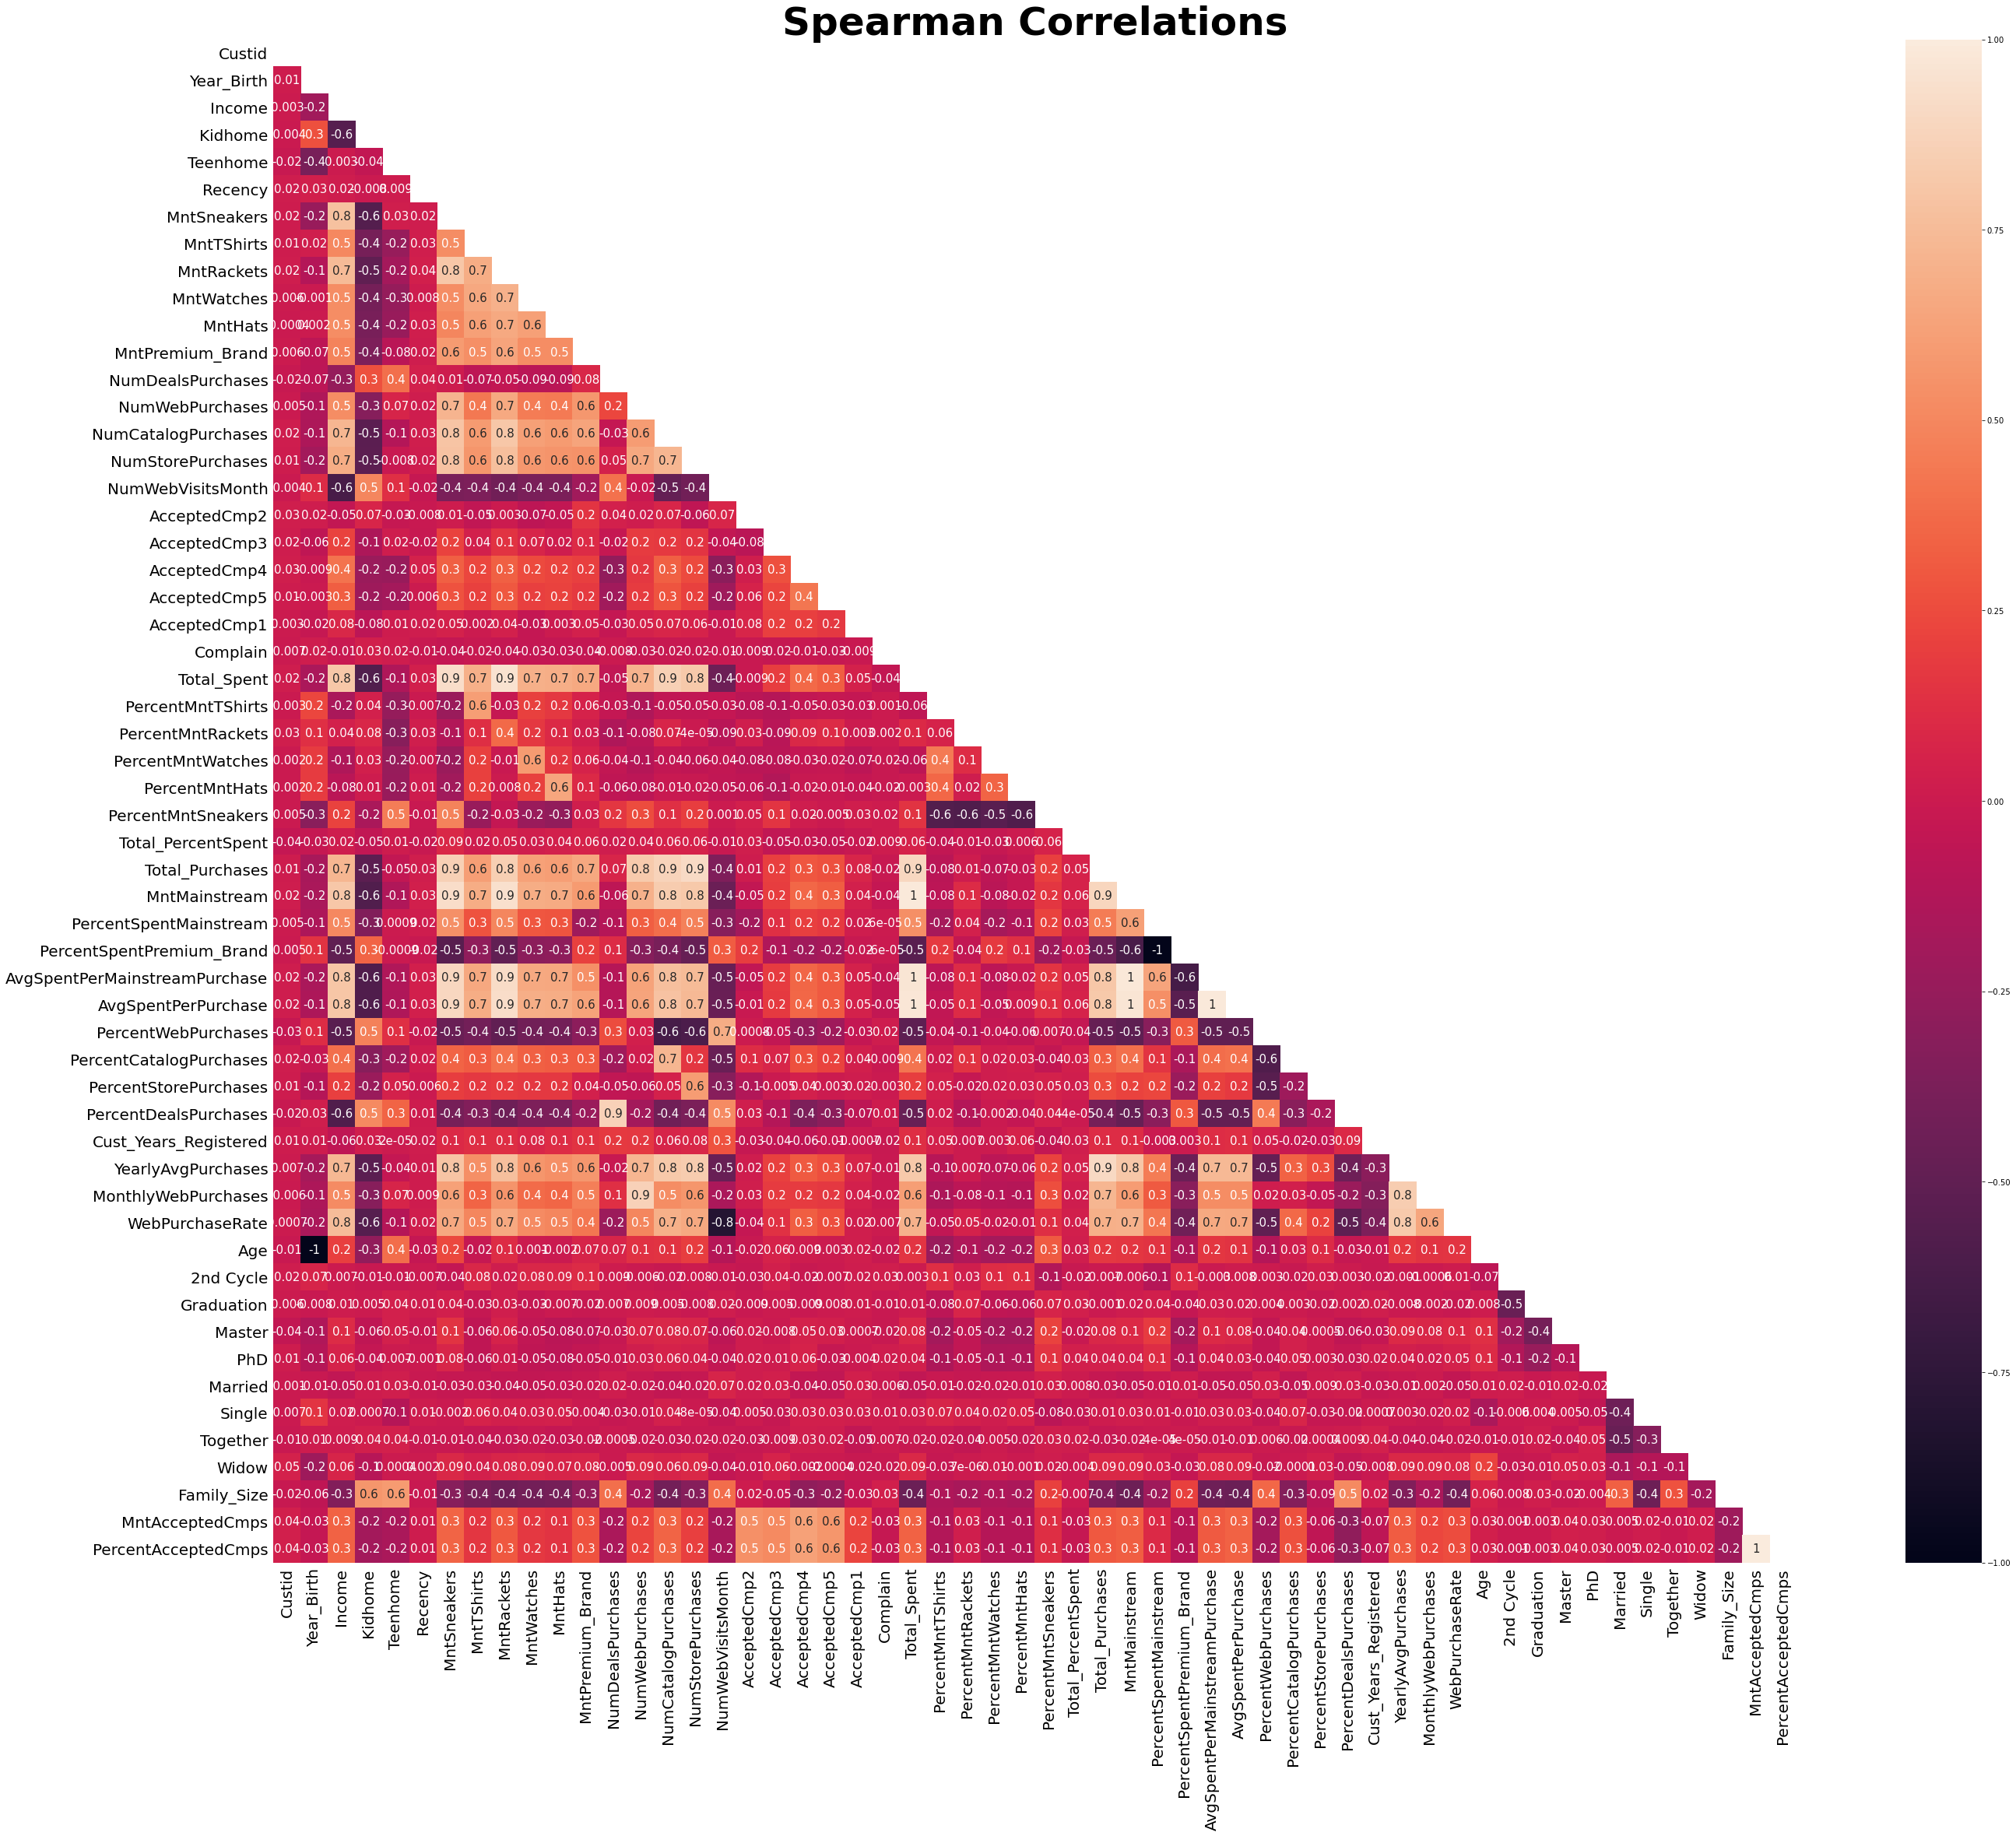

In [66]:
# Initialize a new figure.
fig, ax = plt.subplots(figsize=(50, 36))

# Calculate the correlation matrix using the Spearman correlation, since most of our features are not normally distributed.
correlation_matrix = x_train.corr(method='spearman')

# Create a mask array to hide the upper triangle of the heatmap, since it is redundant.
corr_mask = np.zeros_like(correlation_matrix)
corr_mask[np.triu_indices_from(corr_mask)] = True

# Draw heatmap with correlation coefficients, set scale, and square cells. Because many of our features have non-normal distributions,
# and in order to get a more accurate correlation metric, we will use the the non-parametric Spearman correlation coefficient.
sns.heatmap(data=correlation_matrix,
                      annot=True,
                      annot_kws={'size': 15},
                      vmin=-1,
                      vmax=1,
                      square=True,
                      fmt='.1g',
                      mask=corr_mask
                     )

# Format axis elements.
ax.set_title('Spearman Correlations', size=50, weight='bold')
ax.set_xticklabels(labels=ax.get_xticklabels(), size=20)
ax.set_yticklabels(labels=ax.get_yticklabels(), rotation=0, size=20)
ax.tick_params(axis='both', bottom=False, left=False)
ax.patch.set_alpha(0)

plt.show()
plt.close()

By visualizing the correlation in the heatmaps it is possible to identify the variables with a perfect degree of association, in which the change in value of one variable is exactly proportional to the change in value of the other. Since the value of one variable exactly predicts the value of the other variable, the presence of both features will not add any value to the model.  

<br>For this reason, we will drop the following columns from our dataset from this point onward:
`Dt_Customer`, `Age_Range`, `Year_Birth`, `MntAcceptedCmps`, `AvgSpentPerPurchase`, `AvgSpentPerMainstreamPurchase`, `PercentSpentMainstream`, and `MntMainstream`. We will also drop the `Custid` column as we know it does not carry any predictive value.

In [67]:
# Drop redundant columns.
x_train.drop(columns=['Custid', 'Dt_Customer', 'Age_Range', 'Year_Birth', 'MntAcceptedCmps', 'AvgSpentPerPurchase', 'AvgSpentPerMainstreamPurchase', 'PercentSpentMainstream', 'MntMainstream'], errors='ignore', inplace=True)
x_test.drop(columns=['Custid', 'Dt_Customer', 'Age_Range', 'Year_Birth', 'MntAcceptedCmps', 'AvgSpentPerPurchase', 'AvgSpentPerMainstreamPurchase', 'PercentSpentMainstream', 'MntMainstream'], errors='ignore', inplace=True)

<a class="anchor" id="rfe"></a>
## 6.2 RFE

<br>The **Recursive Feature Elimination** helps to identify the most relevant features by building a model of the entire set and computing an importance score for each feature. The least important are removed, and the model is re-built and the scores computed again.

<br>The optimal number of features, then, is the one that optimizes the model's performance. In this way, we can increase the predictive power of future models and reduce the their susceptibility to the curse of dimensionality.

In [68]:
# Let's try to find out what is the optimal number of features to feed to our models is.

# Set range of features we want to explore.
feature_range = np.arange(1, x_train.shape[1] + 1)  

# Set variables to store the top accuracy score obtained, and the corresponding optimal number of features.
top_accuracy_score = 0
n_optimal_features = 0           
model_scores =[]

for n in feature_range - 1:
    
    # Instantiate the model we will apply the RFE to.
    model = DecisionTreeClassifier(random_state=seed)
    
    # Instantiate the RFE with our model and a given number of features.
    rfe = RFE(estimator=model, n_features_to_select=feature_range[n])
    
    # Fit and transform the RFE to a copy of our data. 
    x_train_rfe = rfe.fit_transform(x_train, y_train)
    x_test_rfe = rfe.transform(x_test)
    
    # Now let's fit our first model to the RFE-transformed data.
    model.fit(x_train_rfe, y_train)
    
    # Get model mean accuracy score and store it so we can compare it with the result of the other iterations.
    model_score = model.score(x_test_rfe, y_test)
    model_scores.append(model_score)
    
    # If the current model score is higher than any previous score, then it becomes the top score, and we update the number of optimal features.
    if model_score > top_accuracy_score:
        top_accuracy_score = model_score
        n_optimal_features = feature_range[n]

print('Optimum number of features: {}'.format(n_optimal_features))
print('Score with {} features: {}'.format(n_optimal_features, top_accuracy_score))

Optimum number of features: 13
Score with 13 features: 0.88


In [69]:
# Now that we have the optimal number of features, let's instantiate our RFE model once more, with the proper input for its "n_feature_to_select" argument.
rfe = RFE(estimator=DecisionTreeClassifier(random_state=seed), n_features_to_select=n_optimal_features)

# Fit the RFE and transform training data, then fit the Decision Tree classifier.
x_rfe = rfe.fit_transform(x_train, y_train) 
model.fit(x_rfe, y_train)

# Let's have a look at the rankings attributed to each feature by the model. Lowest ranks correspond to more important features.
feature_ranks = rfe.ranking_
feature_ranks

array([ 1, 27, 21,  7,  1, 15,  2,  4, 10,  1, 23, 34, 22, 16, 19, 18, 31,
       36, 33, 37, 20,  1, 12,  9,  6,  1, 29, 26,  5,  1,  1,  1,  1,  3,
        1, 35, 25,  8,  1, 32, 17, 11, 13, 14, 28, 30, 24,  1,  1])

In [70]:
# Use the rankings found above to match them to their corresponding features.
rfe_feature_ranking = pd.Series(feature_ranks, index=x_train.columns).sort_values()
rfe_feature_ranking

Income                        1
Age                           1
Cust_Years_Registered         1
PercentStorePurchases         1
PercentCatalogPurchases       1
PercentWebPurchases           1
PercentSpentPremium_Brand     1
PercentMntHats                1
Family_Size                   1
Total_Spent                   1
PercentAcceptedCmps           1
MntSneakers                   1
MntPremium_Brand              1
MntRackets                    2
PercentDealsPurchases         3
MntWatches                    4
Total_Purchases               5
PercentMntWatches             6
Recency                       7
WebPurchaseRate               8
PercentMntRackets             9
MntHats                      10
Master                       11
PercentMntTShirts            12
PhD                          13
Married                      14
MntTShirts                   15
NumStorePurchases            16
Graduation                   17
AcceptedCmp2                 18
NumWebVisitsMonth            19
Complain

In [71]:
# Get a list of all top-ranked features.
rfe_best_features = list(rfe_feature_ranking[rfe_feature_ranking == 1].index)
rfe_best_features

['Income',
 'Age',
 'Cust_Years_Registered',
 'PercentStorePurchases',
 'PercentCatalogPurchases',
 'PercentWebPurchases',
 'PercentSpentPremium_Brand',
 'PercentMntHats',
 'Family_Size',
 'Total_Spent',
 'PercentAcceptedCmps',
 'MntSneakers',
 'MntPremium_Brand']

<a class="anchor" id="decision-tree"></a>
## 6.3 Decision Tree

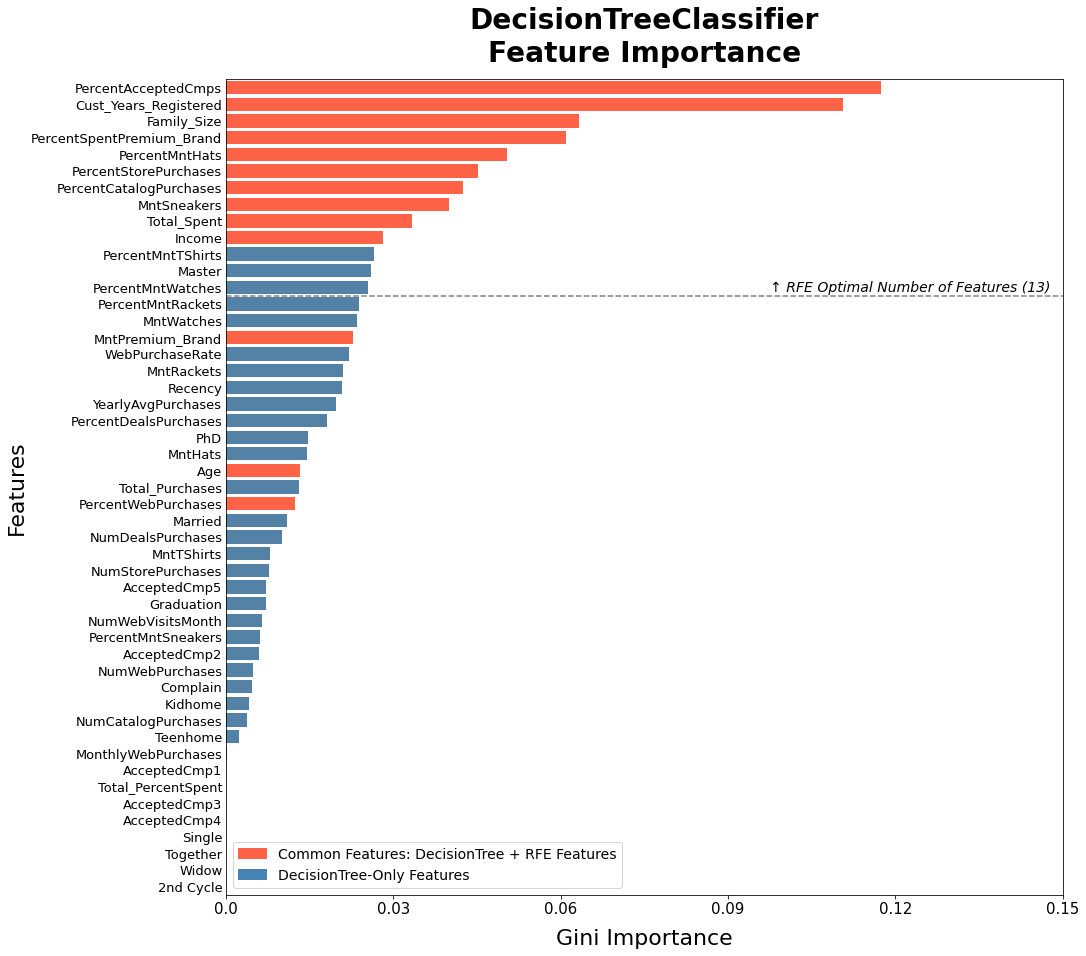

In [78]:
# Instantiate and fit a Decision Tree to our training data.
gini_importance = DecisionTreeClassifier(random_state=seed).fit(x_train, y_train)

# Store the feature importance for each feature calculated by the Decision Tree above in a DataFrame.
features_df = pd.DataFrame(data={'feature': x_train.columns, 'feature importance': gini_importance.feature_importances_})
features_df.sort_values(by='feature importance', ascending=False, inplace=True)

# Initialize a new figure.
fig, ax = plt.subplots(figsize=(15, 15))

# Draw barplot of the feature importances.
sns.barplot(x='feature importance',
                   y='feature',
                   data=features_df,
                   orient='horizontal',
                   color='steelblue'
                  )

# Format axis elements.
ax.set_title('DecisionTreeClassifier\nFeature Importance', y=1.015, size=28, weight='bold')
ax.set_xlabel('Gini Importance', labelpad=12, size=22)
ax.set_ylabel('Features', size=22)
ax.set_xlim(0, 0.15)
ax.set_xticks(np.arange(0, 0.15 + 0.01, 0.03))
ax.set_xticklabels(ax.get_xticks(), size=15)
ax.set_yticklabels(ax.get_yticklabels(), size=13)
ax.tick_params(axis='y', length=0)
ax.axhline(y=n_optimal_features - 0.5, linestyle='--', color='grey')
ax.text(x=0.65,
            y=0.74,
            s='\u2191 RFE Optimal Number of Features (' + str(n_optimal_features) + ')',
            fontdict={'size': 14, 'style': 'italic'},
            transform=ax.transAxes
           )

# Color the bars for the best features found by RFE in a different tone.
for n, patch in enumerate(ax.patches):
    current_feature = features_df.iloc[n, 0]
    if current_feature in rfe_best_features:
        patch.set_facecolor('tomato')

# Create a custom legend.
dt_patch = mpatches.Patch(color='steelblue', label='DecisionTree-Only Features')
rfe_patch = mpatches.Patch(color='tomato', label='Common Features: DecisionTree + RFE Features')
ax.legend(handles=[rfe_patch, dt_patch], fontsize=14)

plt.show()
plt.close()

In [79]:
# Get the 13 features that are considered best by both RFE and the DecisionTree classifier.
tomato_rgba = mcolors.to_rgba('tomato')
common_best_features = [features_df.iloc[n, 0] for n, patch in enumerate(ax.patches) if patch.get_facecolor() == tomato_rgba and n <= 22]
common_best_features

['PercentAcceptedCmps',
 'Cust_Years_Registered',
 'Family_Size',
 'PercentSpentPremium_Brand',
 'PercentMntHats',
 'PercentStorePurchases',
 'PercentCatalogPurchases',
 'MntSneakers',
 'Total_Spent',
 'Income',
 'MntPremium_Brand']

In [74]:
x_train = x_train.loc[:, common_best_features]
x_test = x_test.loc[:, common_best_features]

When there is a lot of data to be used by our model, as previously mentioned, the feature selection task is paramount due to the reduction of computational constraints and the elimination of unhelpful variables.
<br>A top-down tree induction algorithm greedily could help by selecting a split attribute at every node, maximizing the quality measurement. In other words, this technique allows to obtain a feature ranking based on the sum of the improvements in all nodes in which the attribute appears as a splitter (weighted by the fraction of the training data in each node split). The features with higher ranks will be chosen for further investigation.

<a class="anchor" id="modeling"></a>
# 7. Modeling

### Scaling Techniques
 As most classifiers calculate the distance between two points, feature scaling is needed to bring every feature in the same footing without any upfront importance. Indeed, a high distance has an underlying assumption that a higher ranging numbers have a superiority of some sort, that will play a more decisive role while training the model. Besides that, it is important to mention that this step is done after splitting the data between training and test set, to avoid any data leakage from the test into the train set, which could yield extremely biased results on model performance. As the learning algorithm has learnt to deal with the data in scaled form, then the same techniques applied during training should be applied to test dataset, ensuring consistency with the transformation performed and making it possible to evaluate if the model can generalize adequately.   

In the present study 4 types of scaling methods, provided by scikit-learn, are applied:
- The **StandardScaler**, which rescales the model by removing the mean and scaling the data to unit variance, however it assumes the data is normally distributed within each feature (generally, it is not the observed case). Nonetheless, outliers can greatly influence the computed statistics, shrinking the range of the features.


- The **MinMaxScaler** transforms features by scaling each feature to a given range, working well for cases where the distribution is not normal or when the standard deviation is very small. This technique preserves the shape of the dataset (no distortion), however, it is sensitive to outliers. 


- The **RobustScaler**, as the name suggests, is robust to outliers and uses a similar method to the MinMaxScaler, however it scales according to the interquartile range. The statistics of this scaler are based on percentiles and therefore not influenced by outliers.


- The **MaxAbsScaler** scales each feature by its maximum absolute value. It does not center the data and thus does not destroy any sparsity.

### Models

A supervised learning model aims to predict the correct label for newly presented input data. The training data will consist of inputs paired with the correct outputs. During training, the algorithm will search for patterns in the data that correlate with the desired outputs.
If the output label is categorical the model is known as a “classification”. The job of a classification algorithm is then to take an input value and assign it a class, or category, that it fits into based on the training data provided.

In the present study 5 models are applied:

- **Logistic Regression:** Logistic Regression is a predictive model that allows for multivariate analysis and modeling of a dependent variable. This statistical model is similar to linear regression, allowing to describe the relationship between the dependent variable and a group of independent variables, but differing essentially in the outcome, which is a binary variable instead of a continuous one. Hence, the logistic regression estimates the coefficient for each predictor, adjusts them considering the others and so shows how changes in the independent variables are related to changes in the probability of the event occurring.


- **Decision Tree and Random Forest:** A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences in order to predict the value of a target variable based on several input variables. It is a display of an algorithm, drawn upside down with its root at the top, that only contains conditional control statements, where each internal node represents a “test” on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. In this procedure all the features are considered and different split points are tried and tested using a cost function. The split with the lowest cost is selected.<br><br>This algorithm is recursive in nature as the groups formed can be sub-divided using the same strategy. Due to this procedure, this algorithm is also known as the greedy algorithm, as there is an excessive desire of lowering the cost, making the root node the best classifier. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation.
<br><br>Two of the most commonly used metrics in decision trees are the Gini Index and Information Gain, applied in the present study.
Both intend to split a node based on its homogeneity.
Used by the CART (Classification And Regression Tree) algorithm for classification trees, the Gini Index is a measure of how often a randomly chosen element from the set would be incorrectly labeled, considering that this element was randomly labeled. 
The lower the Gini the better the split, since the lower the likelihood of misclassification.
<br><br>Used by the ID3, C4.5 and C5.0 algorithms, Information Gain is based on the concept that less impure nodes require less information to describe them, and more impure nodes require more. This degree of disorganization is defined in a system known as entropy. If the sample is completely homogeneous, then the entropy is zero and if the sample is an equally divided (50% — 50%), it has entropy of one. With categorical target variables, the split which has lowest entropy compared to parent node and other splits is chosen. The lesser the entropy, the better it is.
<br><br>Greedy algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement, in a process known as bagging. And so, a random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest delivers a class prediction and the class with the most votes becomes our model’s prediction.


- **Gaussian Naïve Bayesian:** this classifier is based on Bayes’ theorem with the independence assumptions between predictors. Naïve Bayes classifier assumes that the effect of the value of a predictor on a given class is independent of the values of other predictors. This assumption is called class conditional independence. One key difference between the Bayes approach and others described is that the Bayes approach considers only one class at a time, and this reduces the computation cost.


- **Multi-layer Perceptron:** A multi-layer perceptron (MLP) is a deep, artificial neural network. It is composed of more than one perceptron that teams up with additional perceptrons, stacked in several layers, to solve complex problems. An input layer receives the signal, an output layer makes a decision or prediction about the input, and in between, there is an arbitrary number of hidden layers. A perceptron produces a single output based on several real-valued inputs by forming a linear combination using its input weights.
The activation function also helps the perceptron learn. Backpropagation performs iterative backward passes which attempt to minimize the “loss”, or the difference between the known correct prediction and the actual model prediction outcome from the activation function. With each backward pass, the weights move towards an optimum that minimizes the loss function and results in the most accurate prediction.


In [75]:
# Set scalers to test.
scalers = [
                 StandardScaler(),
                 MinMaxScaler(),
                 MaxAbsScaler(),
                 RobustScaler()
               ]

# Set models to test.
models = [LogisticRegression(random_state=seed),
                 DecisionTreeClassifier(random_state=seed),
                 RandomForestClassifier(random_state=seed),
                 GaussianNB(),
                 MLPClassifier(random_state=seed),
                ]

In [76]:
# Set hyperparameters to test for modell tuning.
parameter_space = {'LogisticRegression': {'C': [1, 10, 100, 1000],
                                                                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                                                    'multi_class': ['ovr', 'multinomial'], 
                                                                    'max_iter': range(100, 600, 100)
                                                                   },
                                 'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],
                                                                          'min_samples_split': [2, 10, 25, 40, 100],
                                                                          'min_samples_leaf': [1, 5, 10, 20, 50],
                                                                          'splitter': ['best', 'random'],
                                                                          'max_features': ['sqrt', 'log2', len(x_train.columns)]
                                                                         },
                                 'RandomForestClassifier': {'n_estimators': [50, 100, 200, 500],
                                                                            'criterion': ['gini', 'entropy'],
                                                                            'min_samples_split': [2, 10, 25, 40, 100],
                                                                            'min_samples_leaf': [1, 5, 10, 20, 50],
                                                                            'max_features': ['sqrt', 'log2', len(x_train.columns)]
                                                                           },
                                 'GaussianNB': {'var_smoothing': [0.0000001, 0.000000001, 0.0000000001]},
                                 'MLPClassifier': {'hidden_layer_sizes': [(10,), (100,), (100,100,100)],
                                                            'activation': ['identity', 'logistic', 'tanh', 'relu'],
                                                            'solver': ['lbfgs', 'sgd', 'adam'],
                                                            'batch_size': [5, 50, 500],
                                                            'learning_rate': ['constant', 'invscaling', 'adaptive'],
                                                            'learning_rate_init': [0.01, 0.001, 0.0001],
                                                            'max_iter': [50, 100, 250, 500]
                                                           }
                                }

<a class="anchor" id="scaler-selection"></a>
## 7.1 Scaler Selection

In [77]:
# Create an empty DataFrame to store model evaluation metrics in.
general_table = pd.DataFrame()

# Go through each model.
for model in models:
    
    # Get current model name.
    model_name = model.__class__.__name__
    print('\nProcessing', model_name, 'model.')
    
    train_scores = {}
    best_parameters = {}
    
    # Iterate through each scaler.
    for scaler in scalers:
        
        # Get current scaler name.
        scaler_name = scaler.__class__.__name__
        print('\tTesting', scaler_name)
        
        # Scale the data.
        x_train_scaled = x_train.copy()
        x_train_scaled = scaler.fit_transform(x_train_scaled)
        
        # Look for best hyperparameters for the current model with scaled data, using a randomized search approach.
        classifier = RandomizedSearchCV(model,
                                                                parameter_space[model_name],
                                                                n_iter=2,
                                                                random_state=seed
                                                               )
        
        # Fit the modell to the scaled data.
        classifier = classifier.fit(x_train_scaled, y_train)

        # Get mean accuracy score for the current model + scaler combination.
        train_scores[scaler_name] = classifier.score(x_train_scaled, y_train)
        
        # Get best hyperparameters combination for the current model + scaler combination.
        best_parameters[scaler_name] = classifier.best_params_
        
    # Store the mean accuracy scores and best hyperparameters set.
    train_scores_df = pd.DataFrame.from_dict(train_scores, orient='index', columns=[model_name + '_train_score'])
    best_parameters_df = pd.DataFrame.from_dict(best_parameters, orient='index')
    best_parameters_df.columns = [model_name + '_' + col for col in best_parameters_df.columns]
    
    # Concatenate current model + scalers information.
    general_table = pd.concat([general_table, train_scores_df, best_parameters_df], axis=1)
    
general_table.T


Processing LogisticRegression model.
	Testing StandardScaler
	Testing MinMaxScaler
	Testing MaxAbsScaler
	Testing RobustScaler

Processing DecisionTreeClassifier model.
	Testing StandardScaler
	Testing MinMaxScaler
	Testing MaxAbsScaler
	Testing RobustScaler

Processing RandomForestClassifier model.
	Testing StandardScaler
	Testing MinMaxScaler
	Testing MaxAbsScaler
	Testing RobustScaler

Processing GaussianNB model.
	Testing StandardScaler
	Testing MinMaxScaler
	Testing MaxAbsScaler
	Testing RobustScaler

Processing MLPClassifier model.
	Testing StandardScaler
	Testing MinMaxScaler
	Testing MaxAbsScaler
	Testing RobustScaler


,StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
LogisticRegression_train_score,0.9245,0.9255,0.9255,0.9245
LogisticRegression_solver,liblinear,liblinear,liblinear,liblinear
LogisticRegression_multi_class,ovr,ovr,ovr,ovr
LogisticRegression_max_iter,100,100,100,100
LogisticRegression_C,100,100,100,100
DecisionTreeClassifier_train_score,0.9325,0.9325,0.9325,0.9325
DecisionTreeClassifier_splitter,best,best,best,best
DecisionTreeClassifier_min_samples_split,2,2,2,2
DecisionTreeClassifier_min_samples_leaf,10,10,10,10
DecisionTreeClassifier_max_features,23,23,23,23


<a class="anchor" id="model-performance"></a>
## 7.2 Model Performance

Given that our training dataset does not have a great number of records (2000), a stratified k-fold cross validation with k = 3 is applied. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. Stratification seeks to ensure that each fold is representative of all strata of the data. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. Ideally, we would have applied the values of 5 for k and 10 for repetitions. These numbers would help avoid further excessive error variance. A higher number of folds and repetitions wasn't chosen considering the trade-off between the time-consuming process and the results.

In [78]:
entries = []
sub_table = general_table.copy()

# Set the number of splits and repeats for our folding strategy.
n_folds = 3
n_repetitions = 2

# Define lists for iteratively keeping track of of fold and repetition number.
fold_idx = list(np.array(range(n_folds)) + 1) * n_repetitions
repetition_idx = np.repeat(range(n_repetitions), n_folds) + 1

# Folding strategy.
RSKF = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repetitions, random_state=seed)

for model in models:
    
    # Get model name.
    model_name = model.__class__.__name__
    print('\nProcessing', model_name, 'model.')

    # Fetch only the information regarding our current model.
    model_cols = [col for col in sub_table.columns if model_name in col]
    model_table = sub_table.loc[:, model_cols]

    # Get the set of scaler + hyperparameters that correspond to the best mean accuracy score.
    max_index = model_table.iloc[:, 0].idxmax()
    table_best = pd.DataFrame(model_table.loc[max_index, :]).T

    # Get the scaler that produces the best mean accuracy score.
    best_scaler_name = table_best.index[0]
    best_scaler = [scaler for scaler in scalers if scaler.__class__.__name__ == best_scaler_name][0]

    # Get hyperparameter names.
    hyperparameter_names = [col.split(sep='_', maxsplit=1)[1] for col in table_best.columns[1:]]

    # Get hyperparameter values.
    hyperparameter_values = table_best.iloc[0, 1:].values
    
    # Combine hyperparameters names and values so we can feed them to the model.
    couples = dict(zip(hyperparameter_names,hyperparameter_values))

    # Instantiate our current model with the hyperparameters.
    if model_name == 'LogisticRegression':
        model = LogisticRegression(random_state=seed, **couples)
    if model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(random_state=seed, **couples)
    if model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(random_state=seed, **couples)
    if model_name == 'GaussianNB':
        model = GaussianNB(**couples)
    if model_name == 'MLPClassifier':
        model = MLPClassifier(random_state=seed, **couples)

    # Scale the training data according to the best scaler for the current model.
    scaled_train_data = x_train.copy()
    scaled_train_data = best_scaler.fit_transform(scaled_train_data)
        
    # Cross validate the training set.
    accuracy_train_scores = cross_val_score(model, scaled_train_data, y_train, scoring='accuracy', cv=RSKF)
    balanced_accuracy_train_scores = cross_val_score(model, scaled_train_data, y_train, scoring='balanced_accuracy', cv=RSKF)
    precision_train_scores = cross_val_score(model, scaled_train_data, y_train, scoring='precision', cv=RSKF)
    recall_train_scores = cross_val_score(model, scaled_train_data, y_train, scoring='recall', cv=RSKF)
    f1_train_scores = cross_val_score(model, scaled_train_data, y_train, scoring='f1', cv=RSKF)
    
    # Scale the test data according to the best scaler for the current model.
    scaled_test_data = x_test.copy()
    scaled_test_data = best_scaler.fit_transform(scaled_test_data)
    
    # Cross validate the test set.
    accuracy_test_scores = cross_val_score(model, scaled_test_data, y_test, scoring='accuracy', cv=RSKF)
    balanced_accuracy_test_scores = cross_val_score(model, scaled_test_data, y_test, scoring='balanced_accuracy', cv=RSKF)
    precision_test_scores = cross_val_score(model, scaled_test_data, y_test, scoring='precision', cv=RSKF)
    recall_test_scores = cross_val_score(model, scaled_test_data, y_test, scoring='recall', cv=RSKF)
    f1_test_scores = cross_val_score(model, scaled_test_data, y_test, scoring='f1', cv=RSKF)
    
    # Create a list with the order of our calculated metrics for both training and test sets.
    scores_list = [accuracy_train_scores, accuracy_test_scores, balanced_accuracy_train_scores, balanced_accuracy_test_scores, \
                          precision_train_scores, precision_test_scores, recall_train_scores, recall_test_scores, f1_train_scores, f1_test_scores]
    
    # Append scores to our empty list above.
    for n, metrics in enumerate(zip(*scores_list)):
        entries.append((model_name, fold_idx[n], repetition_idx[n], *metrics))

# Set column names.
column_names = ['Model', 'Fold', 'Repetition', 'Train_Accuracy', 'Test_Accuracy', 'Train_Balanced Accuracy', 'Test_Balanced Accuracy', \
                              'Train_Precision', 'Test_Precision', 'Train_Recall', 'Test_Recall', 'Train_F1', 'Test_F1']

# Convert our list of scores into a DataFrame.
model_df = pd.DataFrame(entries, columns=column_names)
model_df


Processing LogisticRegression model.

Processing DecisionTreeClassifier model.

Processing RandomForestClassifier model.

Processing GaussianNB model.

Processing MLPClassifier model.


,Model,Fold,Repetition,Train_Accuracy,Test_Accuracy,Train_Balanced Accuracy,Test_Balanced Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1
0,LogisticRegression,1,1,0.914543,0.904192,0.756965,0.729592,0.661538,0.625000,0.551282,0.500000,0.601399,0.555556
1,LogisticRegression,2,1,0.925037,0.916168,0.746223,0.801190,0.769231,0.650000,0.512821,0.650000,0.615385,0.650000
2,LogisticRegression,3,1,0.909910,0.939759,0.709903,0.782671,0.673077,0.846154,0.448718,0.578947,0.538462,0.687500
3,LogisticRegression,1,2,0.920540,0.910180,0.754800,0.732993,0.711864,0.666667,0.538462,0.500000,0.613139,0.571429
4,LogisticRegression,2,2,0.917541,0.916168,0.758663,0.779592,0.682540,0.666667,0.551282,0.600000,0.609929,0.631579
5,LogisticRegression,3,2,0.918919,0.915663,0.737245,0.746151,0.722222,0.666667,0.500000,0.526316,0.590909,0.588235
6,DecisionTreeClassifier,1,1,0.866567,0.784431,0.635257,0.553571,0.412698,0.192308,0.333333,0.250000,0.368794,0.217391
7,DecisionTreeClassifier,2,1,0.895052,0.868263,0.662509,0.622789,0.583333,0.428571,0.358974,0.300000,0.444444,0.352941
8,DecisionTreeClassifier,3,1,0.885886,0.861446,0.701858,0.623881,0.514286,0.375000,0.461538,0.315789,0.486486,0.342857
9,DecisionTreeClassifier,1,2,0.890555,0.868263,0.710015,0.579592,0.536232,0.400000,0.474359,0.200000,0.503401,0.266667


Above we have the metrics of classifier evaluation in order to assess their potential performance.

In [79]:
f1_model_scores = model_df.copy()

# Select only the columns of interest.
f1_model_scores = f1_model_scores.loc[:, ['Model', 'Train_F1', 'Test_F1']]

# Unpivot the train and test columns.
f1_model_scores = pd.melt(f1_model_scores, id_vars='Model', var_name='Set', value_name='F1 Score')
f1_model_scores['Set'] = f1_model_scores['Set'].apply(lambda x: x.split('_')[0])

f1_model_scores.head()

,Model,Set,F1 Score
0,LogisticRegression,Train,0.601399
1,LogisticRegression,Train,0.615385
2,LogisticRegression,Train,0.538462
3,LogisticRegression,Train,0.613139
4,LogisticRegression,Train,0.609929


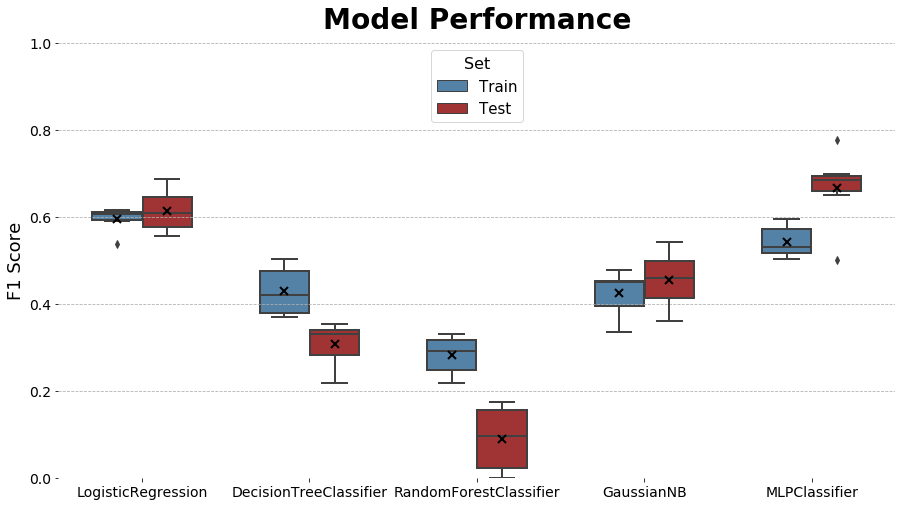

In [80]:
# Initialize a new figure.
fig, ax = plt.subplots(figsize=(15, 8))

# Draw boxplots.
sns.boxplot(x='Model',
                   y='F1 Score',
                   hue='Set',
                   data=f1_model_scores,
                   width=0.6,
                   linewidth=2,
                   palette=['steelblue', 'firebrick'],
                   showmeans=True,
                   meanprops={'marker': 'x', 'markeredgecolor': 'black', 'markersize': 8, 'markeredgewidth': 2},
                   zorder=2
                  )

# Format axis elements.
sns.despine(left=True, bottom=True)
ax.set_title('Model Performance', y=1.02, size=28, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('F1 Score', size=18)
ax.set_ylim(0, 1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)
ax.set_yticklabels([round(tick, 2) for tick in ax.get_yticks()], rotation=0, fontsize=14)
ax.grid(axis='y', linestyle='--', zorder=-1)
ax.legend(title='Set', title_fontsize=16, fontsize=15, loc=9)

plt.show()
plt.close()

The models with the best performance were the Logistic Regression and MLP. Although the Logistic Regression achieved better results regarding the training stage than the MLP Classifier, the highest test score was observed in the latter.On the other hand, the Decision Tree Classifier and the Random Forest Classifier seem to be overfitted, since the F1 Score for the test sets is considerably lower than that for the training sets.

In [81]:
# Compute the mean of each score type by aggregating the above table by model type.
avg_model_df = model_df.groupby(by='Model', sort=False).mean().drop(columns=['Fold', 'Repetition'])
avg_model_df

,Train_Accuracy,Test_Accuracy,Train_Balanced Accuracy,Test_Balanced Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1
Model,,,,,,,,,,
LogisticRegression,0.917748,0.917021,0.743967,0.762032,0.703412,0.686859,0.517094,0.559211,0.594870,0.614050
DecisionTreeClassifier,0.882998,0.840037,0.664044,0.604814,0.502302,0.337447,0.378205,0.296930,0.428848,0.306620
RandomForestClassifier,0.899499,0.883005,0.582561,0.522385,0.858605,0.472222,0.168803,0.050439,0.281685,0.089789
GaussianNB,0.828256,0.825025,0.700706,0.728315,0.352949,0.371686,0.534188,0.601754,0.423868,0.454957
MLPClassifier,0.894250,0.921043,0.739928,0.808593,0.551036,0.676104,0.538462,0.661404,0.543126,0.666090


In [82]:
f1_avg_model_scores = avg_model_df.copy()
f1_avg_model_scores.reset_index(inplace=True)

# Select only the columns of interest.
f1_avg_model_scores = f1_avg_model_scores.loc[:, ['Model', 'Train_F1', 'Test_F1']]

# Unpivot the train and test columns.
f1_avg_model_scores = pd.melt(f1_avg_model_scores, id_vars='Model', var_name='Set', value_name='F1 Score')
f1_avg_model_scores['Set'] = f1_avg_model_scores['Set'].apply(lambda x: x.split('_')[0])

f1_avg_model_scores.head()

,Model,Set,F1 Score
0,LogisticRegression,Train,0.594870
1,DecisionTreeClassifier,Train,0.428848
2,RandomForestClassifier,Train,0.281685
3,GaussianNB,Train,0.423868
4,MLPClassifier,Train,0.543126


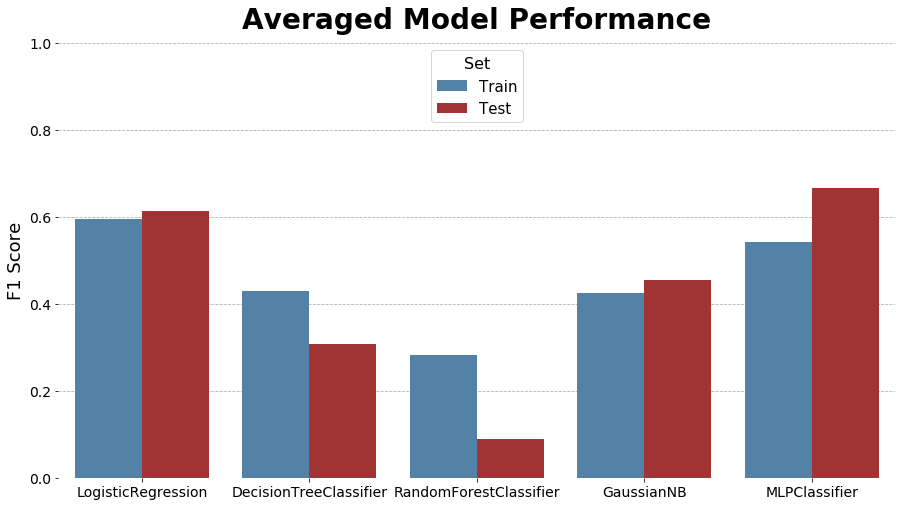

In [83]:
# Initialize a new figure.
fig, ax = plt.subplots(figsize=(15, 8))

# Draw boxplots.
sns.barplot(x='Model',
                   y='F1 Score',
                   hue='Set',
                   data=f1_avg_model_scores,
                   palette=['steelblue', 'firebrick'],
                   zorder=2
                  )

# Format axis elements.
sns.despine(left=True, bottom=True)
ax.set_title('Averaged Model Performance', y=1.02, size=28, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('F1 Score', size=18)
ax.set_ylim(0, 1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)
ax.set_yticklabels([round(tick, 2) for tick in ax.get_yticks()], rotation=0, fontsize=14)
ax.grid(axis='y', linestyle='--', zorder=-1)
ax.legend(title='Set', title_fontsize=16, fontsize=15, loc=9)

plt.show()
plt.close()

Above is presented a more straight-forward visualization, by comparison of the averages for each model.

<a class="anchor" id="cost-matrix"></a>
## 7.3 Cost Matrix

As analysed before, the present dataset is very unbalanced, with around 88% of the cases labeled as 'No' (no acceptance of the marketing offer) and around 12% of the cases labeled as 'Yes' (acceptance of the marketing offer). Therefore it's of great importance to calculate a cost matrix. In a cost matrix the cost of a wrong prediction or a right prediction are calculated.

In our case, there is a missing net profit opportunity of 4 monetary units for each False Positive, and a cost of 16 monetary units per customer for each False Negative.

In [84]:
# Let's now use our business insights to build a cost matix.
contact_cost = 4
customer_revenue = 20

tp_cost = customer_revenue - contact_cost     # correctly contacting a customer that would accept the campaign.
tn_cost = 0                                                        # correctly not contacting a customer that would not have accepted the campaign.
fp_cost = -contact_cost                                     # contacting a customer that would not accept the campaign.
fn_cost = -customer_revenue + contact_cost   # missing a customer that would have accepted the campaign.

# Build the matrix with the costs defined above.
cost_matrix = np.array([[tn_cost, fp_cost], [fn_cost, tp_cost]], dtype=int)
cost_matrix

# count of true negatives is C00, false negatives is C10, true positives is C11 and false positives is C01.

array([[  0,  -4],
       [-16,  16]])

Since it might be more important to classify 1’s properly than 0’s, and we would tolerate a greater misclassification of the latter. Or the reverse might be true, in other words, the costs of misclassification might be asymmetric. We can adjust the cutoff value in such a case to classify more records as the high-value class (in other words, accept more misclassification where the misclassification cost is low).

In [85]:
# Using the cost matrix to calculate the theoretical threshold.
theoretical_threshold = (fp_cost - tn_cost) / (fp_cost - tp_cost + fn_cost - tn_cost)
print('theoretical threshold: ', theoretical_threshold)

theoretical threshold:  0.1111111111111111


By default, a threshold or cutoff value of 0.5 is applied in each model. This value is far from the theoretical threshold resulting from the previous formula. Therefore, confusion matrices will be computed for models with and without the ajdusted threshold, and then compared.

<a class="anchor" id="tuned-models"></a>
## 7.4 Tuned Models

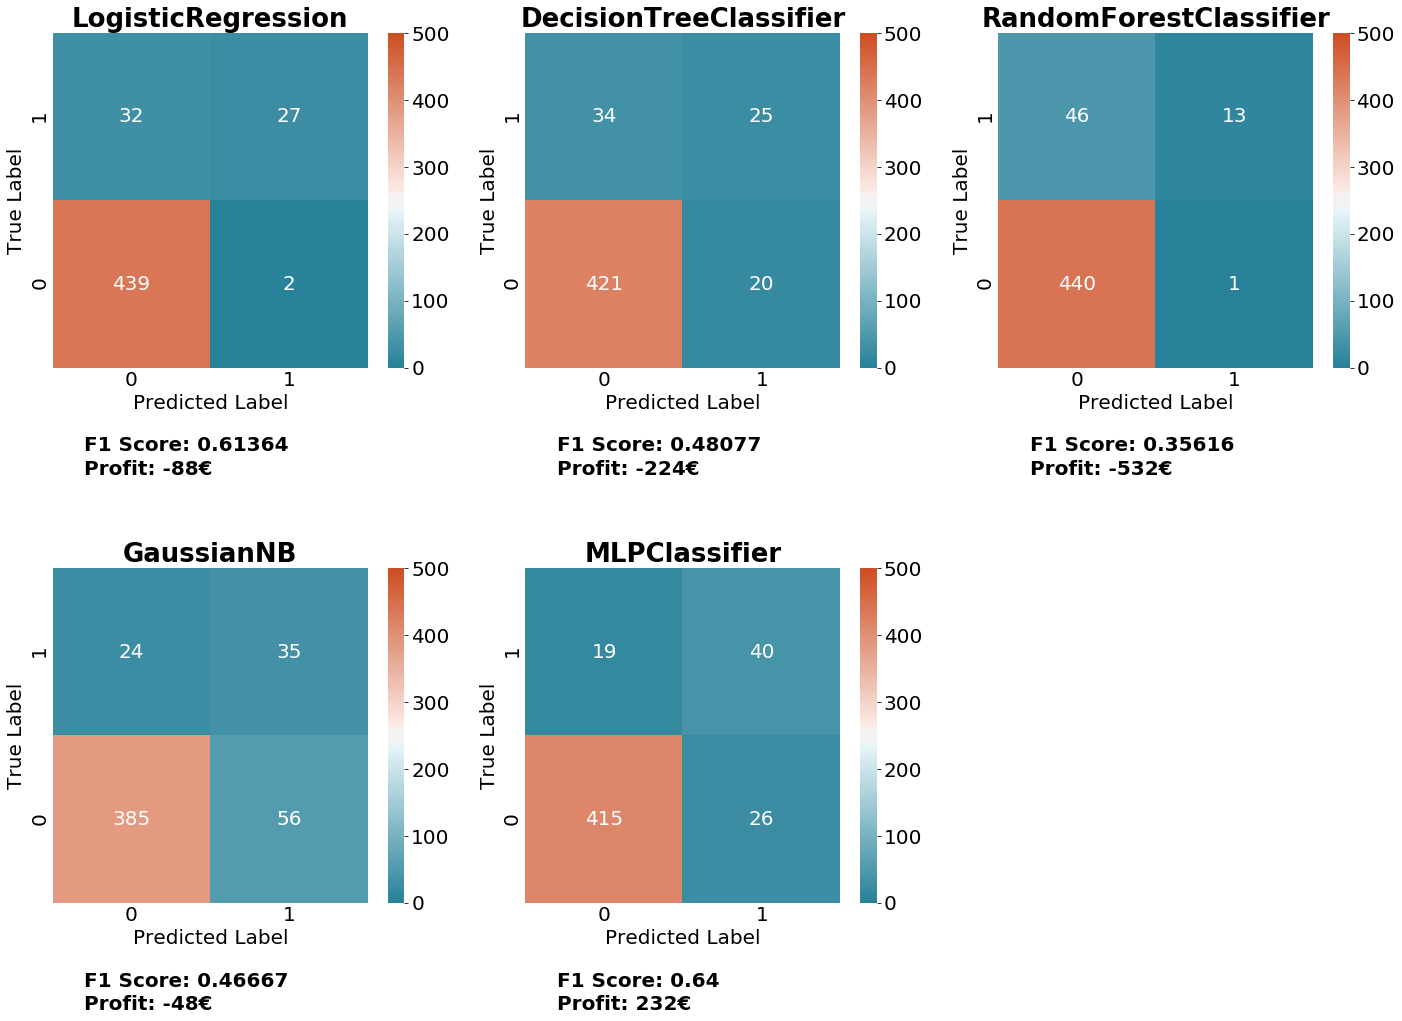

In [86]:
# Initialize a new figure.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))

for n, model in enumerate(models):
    
    # Get model name.
    model_name = model.__class__.__name__
    
    # Fetch only the information regarding our current model.
    model_cols = [col for col in sub_table.columns if model_name in col]
    model_table = sub_table.loc[:, model_cols]
    
    # Get the set of scaler + hyperparameters that correspond to the best mean accuracy score.
    max_index = model_table.iloc[:, 0].idxmax()
    table_best = pd.DataFrame(model_table.loc[max_index, :]).T
    
    # Get the scaler that produces the best mean accuracy score.
    best_scaler_name = table_best.index[0]
    best_scaler = [scaler for scaler in scalers if scaler.__class__.__name__ == best_scaler_name][0]
    
    # Get hyperparameter names.
    hyperparameter_names = [col.split(sep='_', maxsplit=1)[1] for col in table_best.columns[1:]]
    
    # Get hyperparameter values.
    hyperparameter_values = table_best.iloc[0, 1:].values
    
    # Combine hyperparameters names and values so we can feed them to the model.
    couples = dict(zip(hyperparameter_names, hyperparameter_values))
    
    # Instantiate our model with the hyperparameters.
    if model_name == 'LogisticRegression':
        model = LogisticRegression(random_state=seed, **couples)
    if model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(random_state=seed, **couples)
    if model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(random_state=seed, **couples)
    if model_name == 'GaussianNB':
        model = GaussianNB(**couples)
    if model_name == 'MLPClassifier':
        model = MLPClassifier(random_state=seed, **couples)
    
    # Scale the training data according to the best scaler for the current model.
    scaled_train_data = x_train.copy()
    scaled_train_data = best_scaler.fit_transform(scaled_train_data)
    
    # Scale the test data according to the best scaler for the current model.
    scaled_test_data = x_test.copy()
    scaled_test_data = best_scaler.fit_transform(scaled_test_data)
    
    # Set color palette to use.
    colormap = sns.diverging_palette(h_neg=220, h_pos=20, s=90, sep=10, as_cmap=True)
    
    # Fit our model to the data.
    model.fit(scaled_train_data, y_train)
    
    # Predict target classes in our test data with the model.
    y_pred = model.predict(scaled_test_data)
    
    # Get model's F1 score.
    f1_model_score = f1_score(y_test, y_pred)
    
    # Build the model's confusion matrix.
    model_confusion_matrix = confusion_matrix(y_test, y_pred)
    new_cm = np.flip(model_confusion_matrix, axis=0)

    # Calculate profits generated by the model, by combining its confusion matrix with the cost matrix.
    profits = (cost_matrix * model_confusion_matrix).sum()

    # Draw the confusion matrix.
    row_number = 0 if n < 3 else 1
    column_number = n if n < 3 else n - 3
    sns.heatmap(new_cm,
                          vmin=0,
                          vmax=len(scaled_test_data),
                          annot=True,
                          annot_kws={'size': 20, 'color': 'white'},
                          fmt='.3g',
                          cmap=colormap,
                          ax=axes[row_number][column_number]
                         )
    
    # Format axis elements.
    axes[row_number][column_number].set_title(model_name, y=4, size=26, weight='bold')
    axes[row_number][column_number].set_xlabel('Predicted Label', size=20)
    axes[row_number][column_number].set_ylabel('True Label', size=20)
    axes[row_number][column_number].set_xticklabels(axes[row_number][column_number].get_xticklabels(), size=20)
    axes[row_number][column_number].set_yticklabels([1, 0], size=20)
    axes[row_number][column_number].text(x=0.1, y=-0.25, s='F1 Score: ' + str(round(f1_model_score, 5)), size=20, weight='bold', transform=axes[row_number][column_number].transAxes)
    axes[row_number][column_number].text(x=0.1, y=-0.32, s='Profit: ' + str(profits) + '€', size=20, weight='bold', transform=axes[row_number][column_number].transAxes)
    axes[row_number][column_number].tick_params(axis='both', length=0)
    colorbar = axes[row_number][column_number].collections[0].colorbar
    colorbar.ax.tick_params(labelsize=20)
    axes[1][2].spines['top'].set_visible(False)
    axes[1][2].spines['bottom'].set_visible(False)
    axes[1][2].spines['right'].set_visible(False)
    axes[1][2].spines['left'].set_visible(False)
    axes[1][2].set_xticklabels('')
    axes[1][2].set_yticklabels('')
    axes[1][2].tick_params(axis='both', length=0)
    
# Adjust subplot spacing.
plt.subplots_adjust(hspace=0.6)

plt.show()
plt.close()

<a class="anchor" id="tuned-models-+-theoretical-threshold"></a>
## 7.5 Tuned Models + Theoretical Threshold

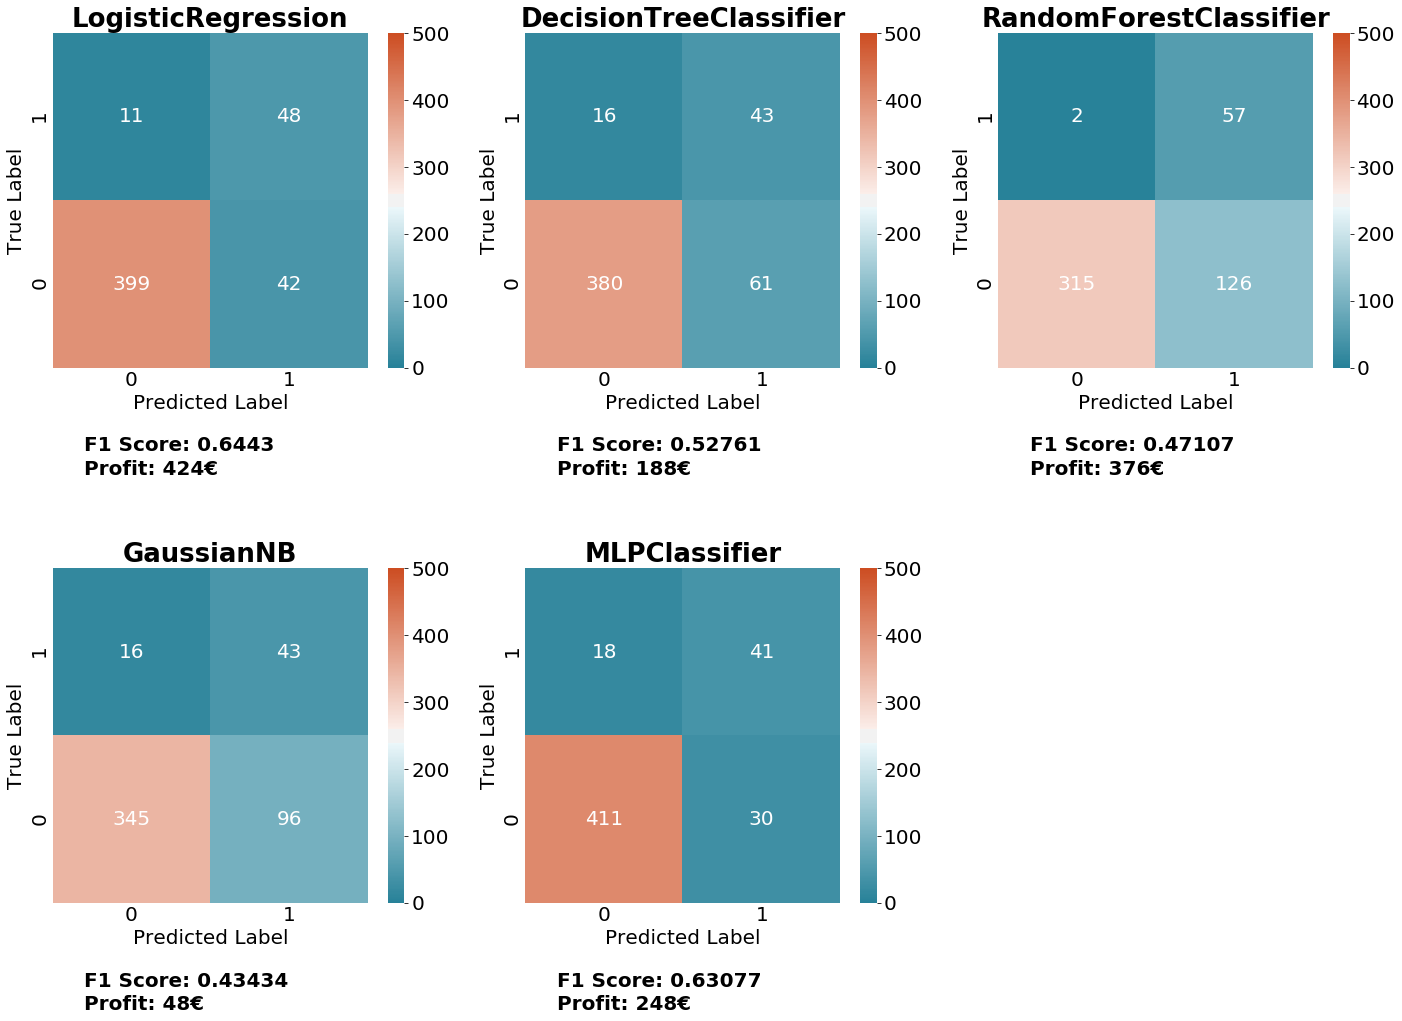

In [87]:
# Initialize a new figure.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))

for n, model in enumerate(models):
    
    # Get model name.
    model_name = model.__class__.__name__
    
    # Fetch only the information regarding our current model.
    model_cols = [col for col in sub_table.columns if model_name in col]
    model_table = sub_table.loc[:, model_cols]
    
    # Get the set of scaler + hyperparameters that correspond to the best mean accuracy score.
    max_index = model_table.iloc[:, 0].idxmax()
    table_best = pd.DataFrame(model_table.loc[max_index, :]).T
    
    # Get the scaler that produces the best mean accuracy score.
    best_scaler_name = table_best.index[0]
    best_scaler = [scaler for scaler in scalers if scaler.__class__.__name__ == best_scaler_name][0]
    
    # Get hyperparameter names.
    hyperparameter_names = [col.split(sep='_', maxsplit=1)[1] for col in table_best.columns[1:]]
    
    # Get hyperparameter values.
    hyperparameter_values = table_best.iloc[0, 1:].values
    
    # Combine hyperparameters names and values so we can feed them to the model.
    couples = dict(zip(hyperparameter_names, hyperparameter_values))
    
    # Instantiate our model with the hyperparameters.
    if model_name == 'LogisticRegression':
        model = LogisticRegression(random_state=seed, **couples)
    if model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(random_state=seed, **couples)
    if model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(random_state=seed, **couples)
    if model_name == 'GaussianNB':
        model = GaussianNB(**couples)
    if model_name == 'MLPClassifier':
        model = MLPClassifier(random_state=seed, **couples)
    
    # Scale the training data according to the best scaler for the current model.
    scaled_train_data = x_train.copy()
    scaled_train_data = best_scaler.fit_transform(scaled_train_data)
    
    # Scale the test data according to the best scaler for the current model.
    scaled_test_data = x_test.copy()
    scaled_test_data = best_scaler.fit_transform(scaled_test_data)
    
    # Set color palette to use.
    colormap = sns.diverging_palette(h_neg=220, h_pos=20, s=90, sep=10, as_cmap=True)
    
    # Fit our model to the data.
    model.fit(scaled_train_data, y_train)
    
    # Predict target classes in our test data with the model, applying our calculated theoretical threshold.
    y_pred = (model.predict_proba(scaled_test_data)[:, 1] >= theoretical_threshold).astype(int)
    
    # Get model's F1 score.
    f1_model_score = f1_score(y_test, y_pred)
    
    # Build the model's confusion matrix.
    model_confusion_matrix = confusion_matrix(y_test, y_pred)
    new_cm = np.flip(model_confusion_matrix, axis=0)
    
    # Calculate profits generated by the model, by combining its confusion matrix with the cost matrix.
    profits = (cost_matrix * model_confusion_matrix).sum()

    # Draw the confusion matrix.
    row_number = 0 if n < 3 else 1
    column_number = n if n < 3 else n - 3
    sns.heatmap(new_cm,
                          vmin=0,
                          vmax=len(scaled_test_data),
                          annot=True,
                          annot_kws={'size': 20, 'color': 'white'},
                          fmt='.3g',
                          cmap=colormap,
                          ax=axes[row_number][column_number]
                         )
    
    # Format axis elements.
    axes[row_number][column_number].set_title(model_name, y=4, size=26, weight='bold')
    axes[row_number][column_number].set_xlabel('Predicted Label', size=20)
    axes[row_number][column_number].set_ylabel('True Label', size=20)
    axes[row_number][column_number].set_xticklabels(axes[row_number][column_number].get_xticklabels(), size=20)
    axes[row_number][column_number].set_yticklabels([1, 0], size=20)
    axes[row_number][column_number].text(x=0.1, y=-0.25, s='F1 Score: ' + str(round(f1_model_score, 5)), size=20, weight='bold', transform=axes[row_number][column_number].transAxes)
    axes[row_number][column_number].text(x=0.1, y=-0.32, s='Profit: ' + str(profits) + '€', size=20, weight='bold', transform=axes[row_number][column_number].transAxes)
    axes[row_number][column_number].tick_params(axis='both', length=0)
    colorbar = axes[row_number][column_number].collections[0].colorbar
    colorbar.ax.tick_params(labelsize=20)
    axes[1][2].spines['top'].set_visible(False)
    axes[1][2].spines['bottom'].set_visible(False)
    axes[1][2].spines['right'].set_visible(False)
    axes[1][2].spines['left'].set_visible(False)
    axes[1][2].set_xticklabels('')
    axes[1][2].set_yticklabels('')
    axes[1][2].tick_params(axis='both', length=0)
    
# Adjust subplot spacing.
plt.subplots_adjust(hspace=0.6)
    
plt.show()
plt.close()

The F1 Scores do not fluctuate greatly comparing to the previous matrices, except for the Logistic Regression, with a decrease of around 0.20, and the Random Forest Classifier, with an increase of around 0.17.

After running the confusion matrices with the adjusted threshold, the estimated profit for the majority of the models saw a considerable improvement, as expected. Of all tested models, the Logistic Regression yields the best profit.

<a class="anchor" id="roc-and-precision-recall-curves"></a>
## 7.6 ROC and Precision Recall Curves

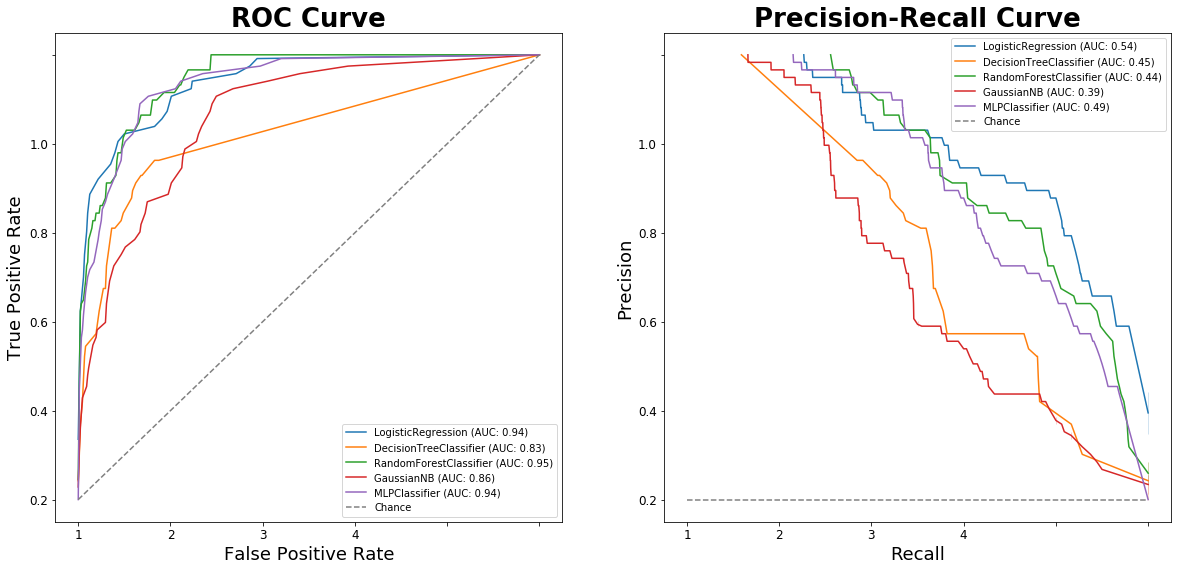

In [89]:
# Initialize a new figure.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))

roc_legend_labels = []
pr_legend_labels = []

for n, model in enumerate(models):
    
    # Get model name.
    model_name = model.__class__.__name__
    
    # Fetch only the information regarding our current model.
    model_cols = [col for col in sub_table.columns if model_name in col]
    model_table = sub_table.loc[:, model_cols]
    
    # Get the set of scaler + hyperparameters that correspond to the best mean accuracy score.
    max_index = model_table.iloc[:, 0].idxmax()
    table_best = pd.DataFrame(model_table.loc[max_index, :]).T
    
    # Get the scaler that produces the best mean accuracy score.
    best_scaler_name = table_best.index[0]
    best_scaler = [scaler for scaler in scalers if scaler.__class__.__name__ == best_scaler_name][0]
    
    # Get hyperparameter names.
    hyperparameter_names = [col.split(sep='_', maxsplit=1)[1] for col in table_best.columns[1:]]
    
    # Get hyperparameter values.
    hyperparameter_values = table_best.iloc[0, 1:].values
    
    # Combine hyperparameters names and values so we can feed them to the model.
    couples = dict(zip(hyperparameter_names, hyperparameter_values))
    
    # Instantiate our model with the hyperparameters.
    if model_name == 'LogisticRegression':
        model = LogisticRegression(random_state=seed, **couples)
    if model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(random_state=seed, **couples)
    if model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(random_state=seed, **couples)
    if model_name == 'GaussianNB':
        model = GaussianNB(**couples)
    if model_name == 'MLPClassifier':
        model = MLPClassifier(random_state=seed, **couples)
    
    # Scale the training data according to the best scaler for the current model.
    scaled_train_data = x_train.copy()
    scaled_train_data = best_scaler.fit_transform(scaled_train_data)
    
    # Scale the test data according to the best scaler for the current model.
    scaled_test_data = x_test.copy()
    scaled_test_data = best_scaler.fit_transform(scaled_test_data)
    
    # Fit our model to the data.
    model.fit(scaled_train_data, y_train)
    
    # Get estimate probabilities for the predictions of the model.
    y_pred_prob = model.predict_proba(scaled_test_data)
    
    # Get True Positive Rate and False Positive Rate in order to draw our model's ROC curve.
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
    
    # Draw the ROC curve and get its AUC.
    sns.lineplot(x=fpr,
                       y=tpr,
                       ci=None,
                       ax=axes[0]
                      )
    
    roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
    
    # Get Precision and Recall in order to draw our model's Precision-Recall curve.
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:, 1])
    
    # Draw the Precision-Recall curve and get its AUC.
    sns.lineplot(x=sorted(precision),
                       y=recall,
                       ax=axes[1]
                      )
    
    pr_auc = auc(sorted(precision), recall)
    
    # Store labels for each figure's legend.
    roc_legend_labels.append(model_name + ' (AUC: ' + str(round(roc_auc, 2)) + ')' )
    pr_legend_labels.append(model_name + ' (AUC: ' + str(round(pr_auc, 2)) + ')' )
    
roc_legend_labels.append('Chance')
pr_legend_labels.append('Chance')

# Draw line representing chance level performance.
axes[0].plot([0, 1],
                   [0, 1],
                   linestyle='--',
                   color='grey',
                  )

# Draw line representing chance level performance.
axes[1].plot([0, 1],
                   [0, 0],
                   linestyle='--',
                   color='grey',
                  )

# Format axis elements.
axes[0].legend(labels=roc_legend_labels)
axes[0].set_title('ROC Curve', size=26, weight='bold')
axes[0].set_xlabel('False Positive Rate', size=18)
axes[0].set_ylabel('True Positive Rate', size=18)
axes[0].set_xticklabels(ax.get_xticks(), size=12)
axes[0].set_yticklabels(ax.get_yticklabels(), size=12)
axes[1].legend(labels=pr_legend_labels, loc='bottom left')
axes[1].set_title('Precision-Recall Curve', size=26, weight='bold')
axes[1].set_xlabel('Recall', size=18)
axes[1].set_ylabel('Precision', size=18)
axes[1].set_xticklabels(ax.get_xticks(), size=12)
axes[1].set_yticklabels(ax.get_yticklabels(), size=12)

plt.show()
plt.close()

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model, while Precision-Recall Curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model. Precision-Recall Curves are useful in cases where there is an imbalance in the observations between the two classes, 0 and 1. Specifically, if there are more examples of class 0 than of class 1, as is the case.

Through interpretation of the Precision-Recall Curves, the Logistic Regression model has the best performance, with an AUC of 0.53, followed by the Random Tree Forest Classifier, the MLP Classifier, the Decision Tree Classifier and, lastly, the GaussianNB model.

<a class="anchor" id="concluding-remarks"></a>
# 8. Concluding Remarks

We conclude that the Logistic Regression is the most adequate predictive model for the presented case, as it shows the best results in terms of the Precision-Recall Curve AUC score and also yields the best profit.